In [3]:
!pip install geoplot
!pip install geopandas
!pip install regionmask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 17.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.0 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp39-cp39-linux_x86_64.whl size=11113630 sha256=d49810c6360e8e457c58052b779b0f322b9d6211b90e3bc4a19a58642a1f8c09
  Stored in directory: /root/.cache/pip/wheels/74/b9/f5/2c94acd7cd21480e6cf63169144d7aac3e8d9cf638225ed578
Successfully built cartopy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import geopandas as gpd 
import geoplot as gplt 
import os
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import regionmask
import seaborn as sns
from sklearn.cluster import KMeans


In [ ]:
msoa_df = pd.read_csv('/content/df_msoa.csv',index_col=0)
msoa_df.head()

,area_id,weight,volume,fat,saturate,salt,sugar,protein,carb,fibre,...,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km,month
0,E02000001,324.424184,96.980324,8.460228,3.357635,0.532997,9.186680,5.190296,15.657155,1.609253,...,6687.0,3697.0,2990.0,1018.0,4349.0,1320.0,43.910124,2.90,2305.862069,Apr
1,E02000002,398.135930,130.327521,9.127851,3.693749,0.487251,11.131110,4.820628,19.554992,1.537343,...,7379.0,3549.0,3830.0,2150.0,4151.0,1078.0,35.567286,2.16,3416.203704,Apr
2,E02000003,392.951786,113.882330,10.327424,4.033037,0.559612,12.655954,4.993013,21.514024,1.547189,...,10720.0,5297.0,5423.0,2762.0,6649.0,1309.0,35.700466,2.14,5009.345794,Apr
3,E02000004,351.236502,90.442397,9.238403,3.675503,0.568714,12.414280,5.018989,19.983740,1.618286,...,6536.0,3119.0,3417.0,1454.0,4044.0,1038.0,38.493115,2.48,2635.483871,Apr
4,E02000005,406.406156,124.659548,9.645993,3.756154,0.582115,12.082549,4.966181,21.496214,1.643720,...,9243.0,4478.0,4765.0,2678.0,5554.0,1011.0,34.156335,1.19,7767.226891,Apr


In [3]:
obesity_df = pd.read_csv('/content/obesity_hospitalization_borough_2016.csv')
obesity_df.head()

,area_id,total_hospitalizations,total_bariatric,prevalence_hospitalizations,prevalence_bariatric
0,E09000001,na,na,na,na
1,E09000002,34,25,0.018,0.014
2,E09000003,94,61,0.026,0.017
3,E09000004,82,51,0.035,0.022
4,E09000005,105,70,0.036,0.022


In [4]:
msoa_geo = gpd.read_file('/content/MSOA_2011_London_gen_MHW.shp')
msoa_geo.head()

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647...."
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19..."
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18..."
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18..."
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18..."


In [5]:
msoa_geo.columns.unique()


Index(['MSOA11CD', 'MSOA11NM', 'LAD11CD', 'LAD11NM', 'RGN11CD', 'RGN11NM',
       'USUALRES', 'HHOLDRES', 'COMESTRES', 'POPDEN', 'HHOLDS', 'AVHHOLDSZ',
       'geometry'],
      dtype='object')

In [6]:
msoa_geo = msoa_geo.drop(columns = ['LAD11CD', 'LAD11NM', 'RGN11CD', 'RGN11NM',
       'USUALRES', 'HHOLDRES', 'COMESTRES', 'POPDEN', 'HHOLDS', 'AVHHOLDSZ'])

In [7]:
msoa_geo = msoa_geo.rename(columns={'MSOA11CD':'area_id','MSOA11NM':'area'})
msoa_geo.head()

,area_id,area,geometry
0,E02000001,City of London 001,"MULTIPOLYGON (((531667.624 180534.992, 531647...."
1,E02000002,Barking and Dagenham 001,"POLYGON ((548881.563 190845.265, 548881.125 19..."
2,E02000003,Barking and Dagenham 002,"POLYGON ((549102.438 189324.625, 548954.500 18..."
3,E02000004,Barking and Dagenham 003,"POLYGON ((551549.998 187364.637, 551478.000 18..."
4,E02000005,Barking and Dagenham 004,"POLYGON ((549099.634 187656.076, 549161.375 18..."


In [ ]:
msoa_geo.geometry.value_counts()

MULTIPOLYGON (((531667.624 180534.992, 531647....    1
POLYGON ((524747.034 183650.146, 524768.077 18...    1
POLYGON ((549102.438 189324.625, 548954.500 18...    1
POLYGON ((551549.998 187364.637, 551478.000 18...    1
POLYGON ((549099.634 187656.076, 549161.375 18...    1
                                                    ..
POLYGON ((541935.375 189976.047, 542028.688 18...    1
POLYGON ((541029.881 176265.023, 541101.997 17...    1
MULTIPOLYGON (((538300.370 177956.632, 538290....    1
POLYGON ((540054.366 179353.136, 540220.352 17...    1
POLYGON ((538834.754 177736.770, 538880.250 17...    1
Name: geometry, Length: 983, dtype: int64

<Axes: >

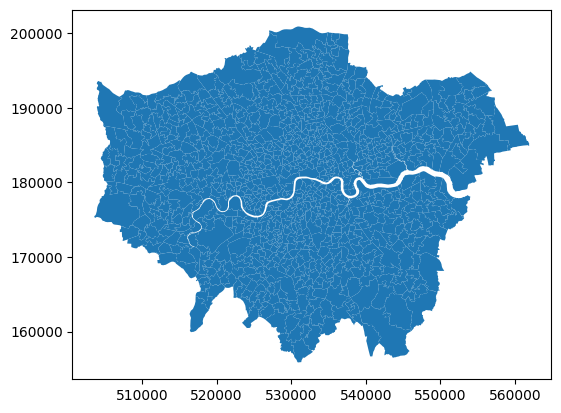

In [ ]:
msoa_geo.plot()

In [102]:
borough_geo = gpd.read_file('/content/London_Borough_Excluding_MHW.shp')
print(len(borough_geo))
borough_geo = borough_geo.rename(columns={'GSS_CODE':'area_id'})
borough_geo.head()

33


,NAME,area_id,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((510253.500 182881.600, 510249.900 18..."


<Axes: >

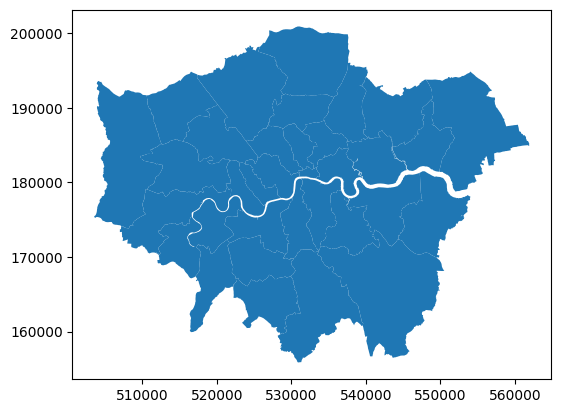

In [ ]:
borough_geo.plot()

In [103]:
obesity_borough = borough_geo.merge(obesity_df,on='area_id')

In [104]:
obesity_borough.head()

,NAME,area_id,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,total_hospitalizations,total_bariatric,prevalence_hospitalizations,prevalence_bariatric
0,Kingston upon Thames,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((516401.600 160201.800, 516407.300 16...",na,na,na,na
1,Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((535009.200 159504.700, 535005.500 15...",70,52,0.019,0.014
2,Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((540373.600 157530.400, 540361.200 15...",60,39,0.018,0.012
3,Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((521975.800 178100.000, 521967.700 17...",68,43,0.029,0.017
4,Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((510253.500 182881.600, 510249.900 18...",128,77,0.041,0.024


<Axes: >

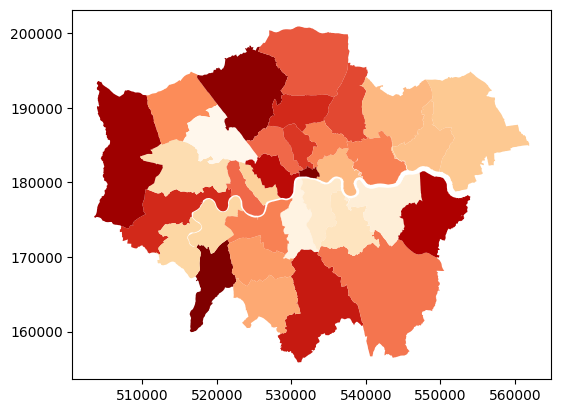

In [ ]:
#ax = obesity_borough.plot(marker='o',column='total_bariatric',zorder=2)
obesity_borough.plot(column='total_hospitalizations',cmap='OrRd')

In [ ]:
obesity_borough.crs

<Projected CRS: PROJCS["OSGB36 / British National Grid",GEOGCS["OS ...>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [105]:
weight_df = pd.read_csv('/content/london_obesity_borough_2012.csv')
weight_df = weight_df.rename(columns={'oslaua':'area_id'})
weight_df.head()


,area_id,f_healthy_weight,f_overweight,f_obese,weighted_sample
0,E09000001,36.5,30.5,31.4,20
1,E09000002,33.4,31.9,31.6,409
2,E09000003,42.1,35.2,20.5,862
3,E09000004,33.5,43.1,23.0,589
4,E09000005,43.9,34.9,19.5,712


In [106]:
obesity_borough = borough_geo.merge(weight_df,on='area_id')
obesity_borough.head()

,NAME,area_id,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,f_healthy_weight,f_overweight,f_obese,weighted_sample
0,Kingston upon Thames,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((516401.600 160201.800, 516407.300 16...",44.4,40.5,14.6,398
1,Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((535009.200 159504.700, 535005.500 15...",36.6,37.7,24.3,858
2,Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((540373.600 157530.400, 540361.200 15...",34.3,43.8,21.2,743
3,Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((521975.800 178100.000, 521967.700 17...",35.4,41.0,21.8,628
4,Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((510253.500 182881.600, 510249.900 18...",42.1,39.0,18.2,807


In [ ]:
borough_df = pd.read_csv('/content/borough_df.csv',index_col=0)
borough_df.head()

In [ ]:
borough_df.columns.values.tolist()

['area_id',
 'weight',
 'volume',
 'fat',
 'saturate',
 'salt',
 'sugar',
 'protein',
 'carb',
 'fibre',
 'alcohol',
 'energy_tot',
 'h_nutrients_calories',
 'f_beer',
 'f_dairy',
 'f_eggs',
 'f_fats_oils',
 'f_fish',
 'f_fruit_veg',
 'f_grains',
 'f_meat_red',
 'f_poultry',
 'f_readymade',
 'f_sauces',
 'f_soft_drinks',
 'f_spirits',
 'f_sweets',
 'f_tea_coffee',
 'f_water',
 'f_wine',
 'transaction_days',
 'num_transactions',
 'man_day',
 'population',
 'male',
 'female',
 'age_0_17',
 'age_18_64',
 'age_65+',
 'avg_age',
 'area_sq_km',
 'people_per_sq_km',
 'month']

In [108]:
yearly_borough = pd.read_csv('/content/year_borough_grocery.csv',usecols=['area_id', 'weight','volume','fat','saturate','salt','sugar','protein','carb','fibre','alcohol',
                                 'energy_tot','h_nutrients_calories','f_beer', 'f_dairy', 'f_eggs', 'f_fats_oils', 'f_fish', 
                                  'f_fruit_veg', 'f_grains', 'f_meat_red', 'f_poultry', 'f_readymade', 'f_sauces', 
                                  'f_soft_drinks', 'f_spirits', 'f_sweets', 'f_tea_coffee', 'f_water', 'f_wine',
                                  'transaction_days', 'num_transactions', 'man_day', 'population', 'male', 'female',
                                  'age_0_17', 'age_18_64', 'age_65+', 'avg_age', 'area_sq_km', 'people_per_sq_km'])
yearly_borough.head()

,area_id,weight,volume,fat,saturate,salt,sugar,protein,carb,fibre,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
0,E09000001,323.174750,98.842963,8.472985,3.361599,0.530496,9.278065,5.253333,15.779639,1.619850,...,103883,6687.0,3697.0,2990.0,1018.0,4349.0,1320.0,43.910124,2.90,2305.862069
1,E09000002,421.304125,122.341294,9.209959,3.596834,0.603081,10.793244,5.193872,19.784988,1.590335,...,397127,203101.0,99442.0,103659.0,60281.0,123180.0,19640.0,33.017321,36.09,5627.625381
2,E09000003,407.170491,114.933771,8.594464,3.407353,0.567211,9.530548,5.129627,17.025950,1.638639,...,4131210,378778.0,186357.0,192421.0,88754.0,237036.0,52988.0,37.195582,86.76,4365.813739
3,E09000004,359.544126,106.446426,9.119180,3.466346,0.591326,10.941085,5.304496,19.997105,1.657118,...,380177,242387.0,116814.0,125573.0,56028.0,146237.0,40122.0,38.880749,60.58,4001.105976
4,E09000005,434.324141,128.930369,8.962466,3.559913,0.570477,10.148610,5.132915,18.726476,1.585978,...,2541113,323443.0,163939.0,159504.0,75033.0,211885.0,36525.0,35.766416,43.28,7473.267098


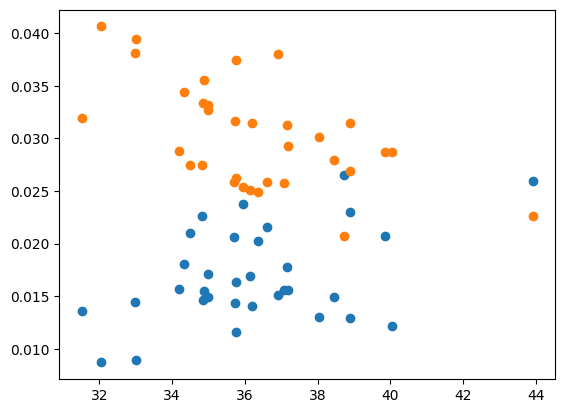

In [ ]:
plt.scatter(yearly_borough['avg_age'],yearly_borough['f_wine'])
plt.scatter(yearly_borough['avg_age'],yearly_borough['f_water'])
plt.show()

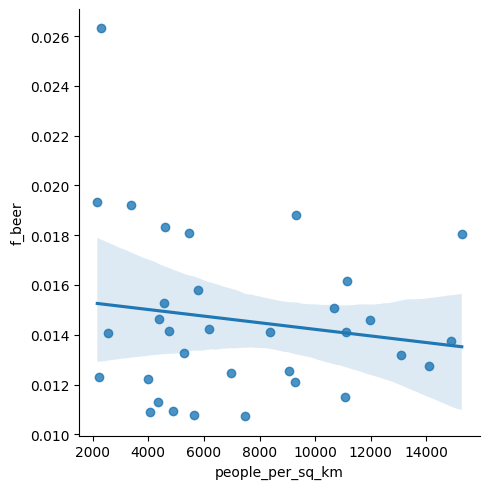

In [ ]:
import seaborn as sns
sns.lmplot(x='people_per_sq_km',y='f_beer',data=yearly_borough)

In [109]:
analyse_ob_1 = pd.merge(obesity_borough,yearly_borough[['area_id','f_dairy','f_fats_oils','f_fruit_veg','f_meat_red','f_readymade']],on='area_id')
analyse_ob_1 = analyse_ob_1.sort_values(by=['f_healthy_weight'])
analyse_ob_1.head()

,NAME,area_id,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,f_healthy_weight,f_overweight,f_obese,weighted_sample,f_dairy,f_fats_oils,f_fruit_veg,f_meat_red,f_readymade
6,Hillingdon,E09000017,11570.063,0.000,F,NaN,NaN,"POLYGON ((510599.800 191689.500, 510615.200 19...",32.6,43.5,23.7,650,0.111703,0.029880,0.278668,0.052968,0.061800
15,Enfield,E09000010,8220.025,0.000,F,NaN,NaN,"POLYGON ((531023.500 200933.600, 531039.900 20...",33.3,37.8,26.4,727,0.105186,0.033649,0.265979,0.060895,0.054655
31,Barking and Dagenham,E09000002,3779.934,169.150,F,NaN,NaN,"MULTIPOLYGON (((543905.400 183199.100, 543905....",33.4,31.9,31.6,409,0.096583,0.031448,0.248116,0.051076,0.061959
14,Bexley,E09000004,6428.649,370.619,F,NaN,NaN,"POLYGON ((547226.200 181299.300, 547320.900 18...",33.5,43.1,23.0,589,0.095073,0.025275,0.251681,0.046667,0.080289
13,Greenwich,E09000011,5044.190,310.785,F,NaN,NaN,"MULTIPOLYGON (((537238.700 178137.700, 537242....",34.0,40.8,23.6,621,0.103941,0.031428,0.265657,0.058502,0.061153


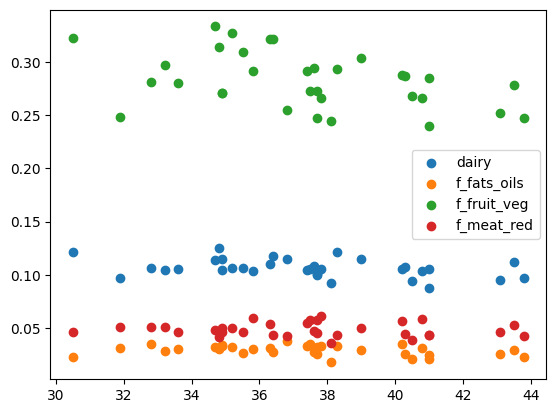

In [ ]:
plt.scatter(analyse_ob_1['f_overweight'],analyse_ob_1['f_dairy'],label='dairy')
#plt.show()
plt.scatter(analyse_ob_1['f_overweight'],analyse_ob_1['f_fats_oils'],label='f_fats_oils')
#plt.show()
plt.scatter(analyse_ob_1['f_overweight'],analyse_ob_1['f_fruit_veg'],label='f_fruit_veg')
#plt.show()
plt.scatter(analyse_ob_1['f_overweight'],analyse_ob_1['f_meat_red'],label='f_meat_red')
plt.legend()
plt.show()

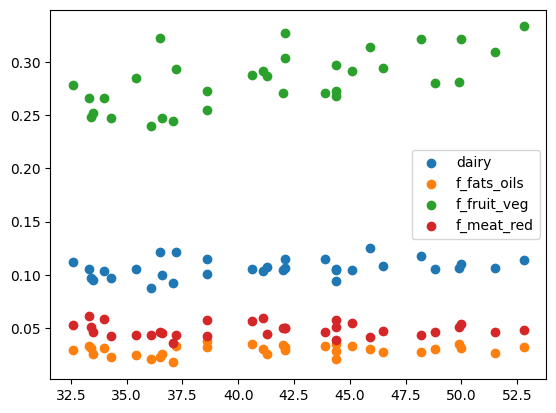

In [ ]:
analyse_ob_1 = analyse_ob_1.sort_values(by=['f_healthy_weight'])
plt.scatter(analyse_ob_1['f_healthy_weight'],analyse_ob_1['f_dairy'],label='dairy')
#plt.show()
plt.scatter(analyse_ob_1['f_healthy_weight'],analyse_ob_1['f_fats_oils'],label='f_fats_oils')
#plt.show()
plt.scatter(analyse_ob_1['f_healthy_weight'],analyse_ob_1['f_fruit_veg'],label='f_fruit_veg')
#plt.show()
plt.scatter(analyse_ob_1['f_healthy_weight'],analyse_ob_1['f_meat_red'],label='f_meat_red')
plt.legend()
plt.show()

In [24]:
analyse_ob_1['coords'] = analyse_ob_1['geometry'].apply(lambda x: x.representative_point().coords[:])
analyse_ob_1['coords'] = [coords[0] for coords in analyse_ob_1['coords']]

In [43]:
analyse_ob_1['NAME'] = analyse_ob_1['NAME'].apply(lambda x: x.replace(' ','\n'))
analyse_ob_1['f_healthy_weight'] = analyse_ob_1['f_healthy_weight'].apply(lambda x: x/100)
analyse_ob_1['f_overweight'] = analyse_ob_1['f_overweight'].apply(lambda x: x/100)


In [44]:
analyse_ob_1.head()

,NAME,area_id,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,f_healthy_weight,f_overweight,f_obese,weighted_sample,f_dairy,f_fats_oils,f_fruit_veg,f_meat_red,f_readymade,coords
6,Hillingdon,E09000017,11570.063,0.000,F,NaN,NaN,"POLYGON ((510599.800 191689.500, 510615.200 19...",0.326,0.435,23.7,650,0.111703,0.029880,0.278668,0.052968,0.061800,"(507551.3548926156, 183726.3)"
15,Enfield,E09000010,8220.025,0.000,F,NaN,NaN,"POLYGON ((531023.500 200933.600, 531039.900 20...",0.333,0.378,26.4,727,0.105186,0.033649,0.265979,0.060895,0.054655,"(532830.3245624411, 196193.0)"
31,Barking\nand\nDagenham,E09000002,3779.934,169.150,F,NaN,NaN,"MULTIPOLYGON (((543905.400 183199.100, 543905....",0.334,0.319,31.6,409,0.096583,0.031448,0.248116,0.051076,0.061959,"(549164.0099264706, 186289.25)"
14,Bexley,E09000004,6428.649,370.619,F,NaN,NaN,"POLYGON ((547226.200 181299.300, 547320.900 18...",0.335,0.431,23.0,589,0.095073,0.025275,0.251681,0.046667,0.080289,"(548985.4553792856, 175714.5)"
13,Greenwich,E09000011,5044.190,310.785,F,NaN,NaN,"MULTIPOLYGON (((537238.700 178137.700, 537242....",0.340,0.408,23.6,621,0.103941,0.031428,0.265657,0.058502,0.061153,"(542382.9616202307, 176366.35)"


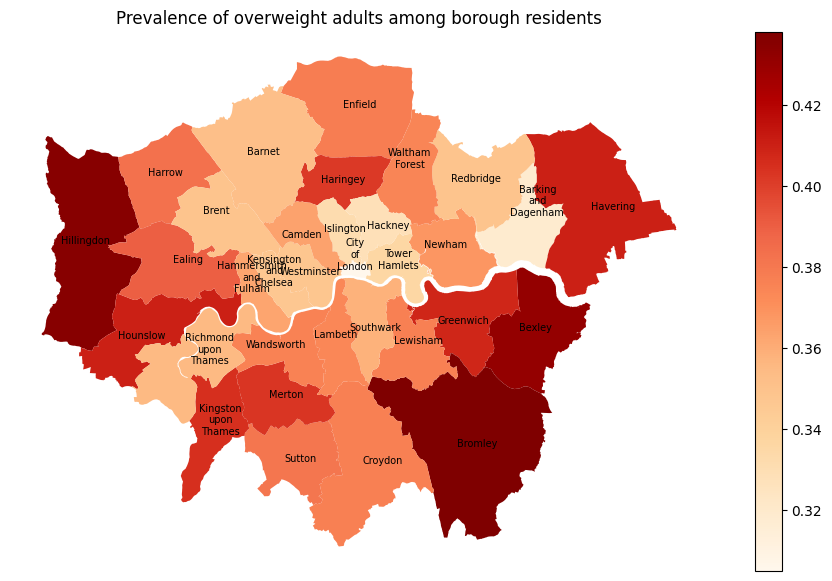

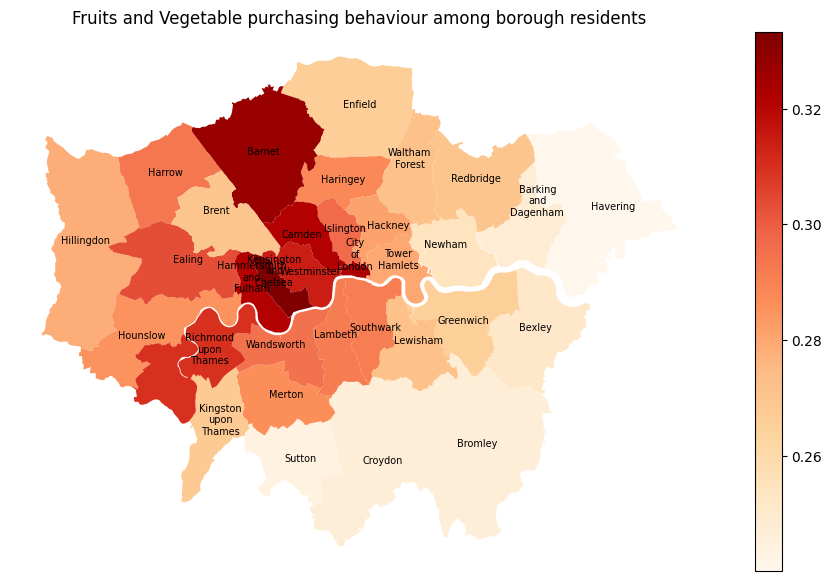

In [47]:
ax = analyse_ob_1.plot(column='f_overweight',legend=True,cmap='OrRd',figsize=[12,7])
plt.title('Prevalence of overweight adults among borough residents')
for idx, row in analyse_ob_1.iterrows():
    plt.annotate(text=row['NAME'], xy=row['coords'],
                 horizontalalignment='center',fontsize=7)
ax.set_axis_off()
ax2 = analyse_ob_1.plot(column='f_fruit_veg',legend=True,cmap='OrRd',figsize=[12,7])
plt.title('Fruits and Vegetable purchasing behaviour among borough residents')
for idx, row in analyse_ob_1.iterrows():
    plt.annotate(text=row['NAME'], xy=row['coords'],
                 horizontalalignment='center',fontsize=7)
ax2.set_axis_off()


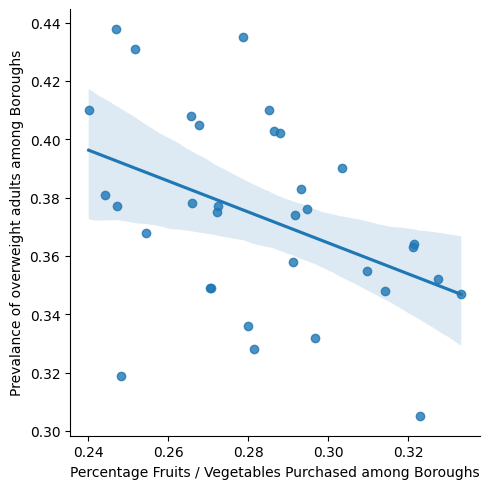

In [61]:
ax = sns.lmplot(x='f_fruit_veg',y='f_overweight',data=analyse_ob_1)
ax.set(xlabel='Percentage Fruits / Vegetables Purchased among Boroughs',
       ylabel='Prevalance of overweight adults among Boroughs'
      )

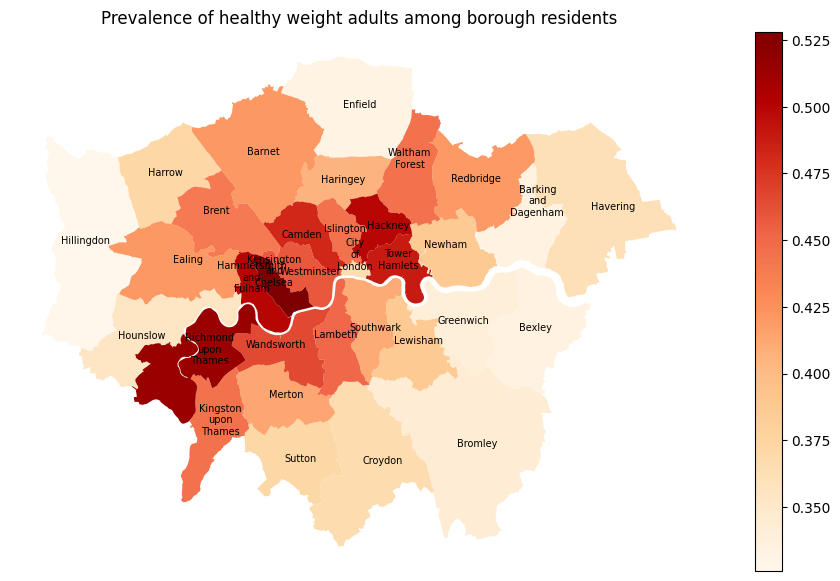

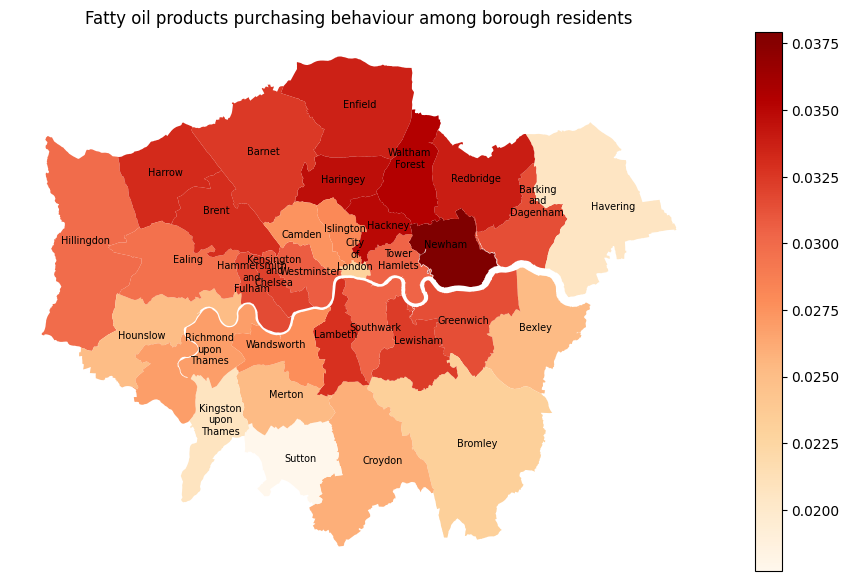

In [62]:

ax = analyse_ob_1.plot(column='f_healthy_weight',legend=True,cmap='OrRd',figsize=[12,7])
plt.title('Prevalence of healthy weight adults among borough residents')
for idx, row in analyse_ob_1.iterrows():
    plt.annotate(text=row['NAME'], xy=row['coords'],
                 horizontalalignment='center',fontsize=7)
ax.set_axis_off()
ax2 = analyse_ob_1.plot(column='f_fats_oils',legend=True,cmap='OrRd',figsize=[12,7])
plt.title('Fatty oil products purchasing behaviour among borough residents')
for idx, row in analyse_ob_1.iterrows():
    plt.annotate(text=row['NAME'], xy=row['coords'],
                 horizontalalignment='center',fontsize=7)
ax2.set_axis_off()


Text(17.015624999999986, 0.5, 'Prevalance of healthy-weight \n adults among Boroughs')

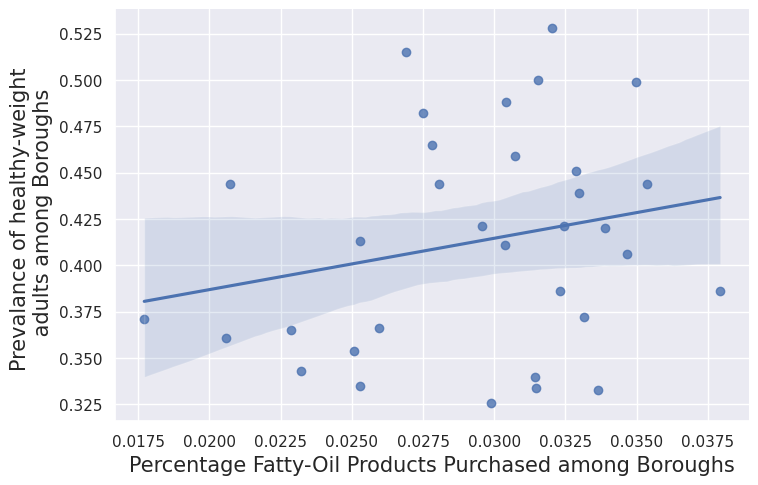

In [89]:
sns.set(rc={"figure.figsize":(10, 10)}) 
sns.lmplot(x='f_fats_oils',y='f_healthy_weight',data=analyse_ob_1,height=5, aspect=1.5)
plt.xlabel('Percentage Fatty-Oil Products Purchased among Boroughs',fontsize=15)
plt.ylabel('Prevalance of healthy-weight \n adults among Boroughs',fontsize=15
      )

In [ ]:
analyse_ob_1.plot(column='f_healthy_weight',legend=True,cmap='Reds')
analyse_ob_1.plot(column='f_meat_red',legend=True,cmap='Reds')


In [48]:
analyse_ob_2 = pd.merge(obesity_borough,yearly_borough[['area_id','f_beer','f_wine','f_soft_drinks','f_spirits','alcohol']],on='area_id')
#analyse_ob_2 = analyse_ob_2.sort_values(by=['total_hospitalizations'])
analyse_ob_2.head()

,NAME,area_id,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,f_healthy_weight,f_overweight,f_obese,weighted_sample,f_beer,f_wine,f_soft_drinks,f_spirits,alcohol
0,Kingston upon Thames,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((516401.600 160201.800, 516407.300 16...",44.4,40.5,14.6,398,0.018333,0.015595,0.032124,0.003200,0.235685
1,Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((535009.200 159504.700, 535005.500 15...",36.6,37.7,24.3,858,0.014641,0.015095,0.039888,0.003607,0.224621
2,Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((540373.600 157530.400, 540361.200 15...",34.3,43.8,21.2,743,0.019327,0.020766,0.035204,0.003032,0.273349
3,Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((521975.800 178100.000, 521967.700 17...",35.4,41.0,21.8,628,0.014150,0.016364,0.028579,0.003298,0.233291
4,Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((510253.500 182881.600, 510249.900 18...",42.1,39.0,18.2,807,0.014243,0.016891,0.023124,0.003230,0.234214


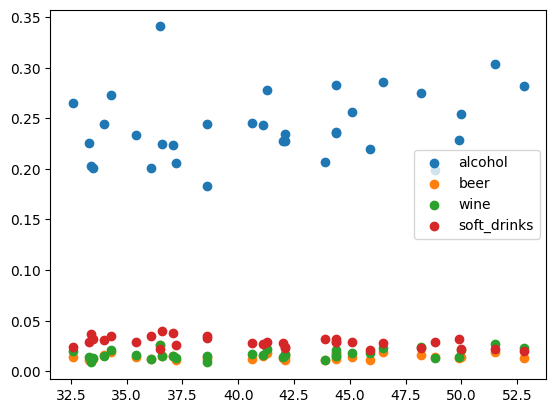

In [ ]:
analyse_ob_2 = analyse_ob_2.sort_values(by=['f_healthy_weight'])
plt.scatter(analyse_ob_2['f_healthy_weight'],analyse_ob_2['alcohol'],label='alcohol')
plt.scatter(analyse_ob_2['f_healthy_weight'],analyse_ob_2['f_beer'],label='beer')
plt.scatter(analyse_ob_2['f_healthy_weight'],analyse_ob_2['f_wine'],label='wine')
plt.scatter(analyse_ob_2['f_healthy_weight'],analyse_ob_2['f_soft_drinks'],label='soft_drinks')
plt.legend()
plt.show()

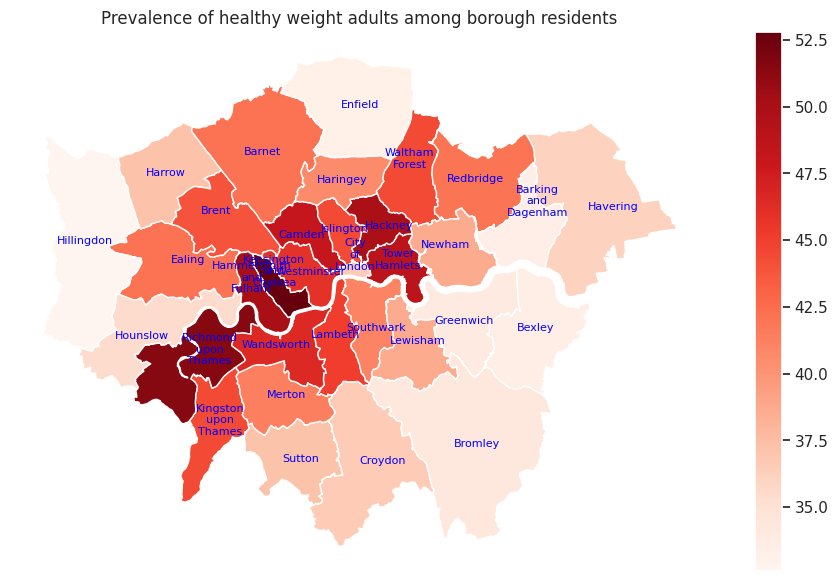

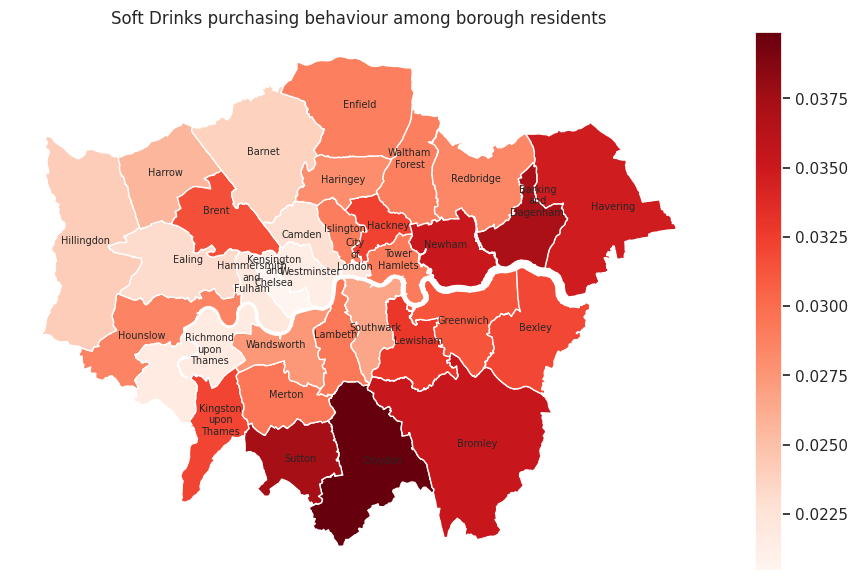

In [97]:
ax = analyse_ob_2.plot(column='f_healthy_weight',legend=True,cmap='Reds',figsize=[12,7])
plt.title('Prevalence of healthy weight adults among borough residents')
for idx, row in analyse_ob_1.iterrows():
    plt.annotate(text=row['NAME'], xy=row['coords'],
                 horizontalalignment='center',fontsize=8,color='blue')
ax.set_axis_off()
ax2 = analyse_ob_2.plot(column='f_soft_drinks',legend=True,cmap='Reds',figsize=[12,7])
plt.title('Soft Drinks purchasing behaviour among borough residents')
for idx, row in analyse_ob_1.iterrows():
    plt.annotate(text=row['NAME'], xy=row['coords'],
                 horizontalalignment='center',fontsize=7)
ax2.set_axis_off()


Text(41.140624999999986, 0.5, 'Prevalance of healthy-weight \n adults among Boroughs')

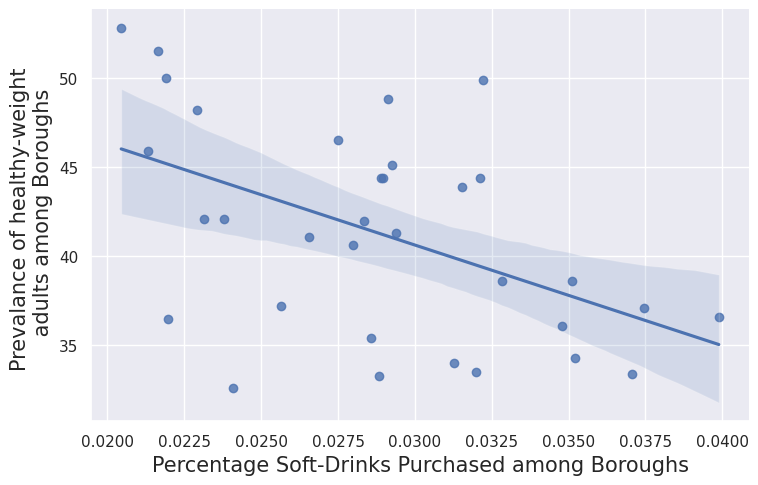

In [98]:
sns.lmplot(x='f_soft_drinks',y='f_healthy_weight',data=analyse_ob_2,height=5, aspect=1.5)
plt.xlabel('Percentage Soft-Drinks Purchased among Boroughs',fontsize=15)
plt.ylabel('Prevalance of healthy-weight \n adults among Boroughs',fontsize=15
      )

# **Task 2**


In [111]:
lsoa_yearly = pd.read_csv('/content/year_lsoa_grocery.csv',usecols=['f_beer', 'f_dairy', 'f_eggs', 'f_fats_oils', 'f_fish', 
                                  'f_fruit_veg', 'f_grains', 'f_meat_red', 'f_poultry', 'f_readymade', 'f_sauces', 
                                  'f_soft_drinks', 'f_spirits', 'f_sweets', 'f_tea_coffee', 'f_water', 'f_wine' ])
lsoa_yearly.head()

,f_beer,f_dairy,f_eggs,f_fats_oils,f_fish,f_fruit_veg,f_grains,f_meat_red,f_poultry,f_readymade,f_sauces,f_soft_drinks,f_spirits,f_sweets,f_tea_coffee,f_water,f_wine
0,0.014692,0.139007,0.012222,0.022962,0.022754,0.345716,0.107619,0.044650,0.013210,0.060226,0.007827,0.015473,0.002795,0.133182,0.004811,0.018086,0.034768
1,0.019417,0.112283,0.011716,0.017708,0.024524,0.367054,0.103923,0.042397,0.017791,0.063667,0.009801,0.018079,0.003089,0.119057,0.004962,0.023886,0.040647
2,0.030823,0.126962,0.009050,0.020776,0.014501,0.278798,0.124130,0.049692,0.012921,0.075591,0.007001,0.023451,0.003629,0.148236,0.004354,0.023708,0.046376
3,0.016457,0.115883,0.011265,0.025449,0.021492,0.303718,0.133874,0.047449,0.019508,0.058795,0.013751,0.024878,0.002717,0.154374,0.005047,0.028512,0.016832
4,0.008197,0.103753,0.014835,0.032810,0.015971,0.271612,0.140127,0.045239,0.018243,0.049738,0.012629,0.039381,0.002673,0.193919,0.006838,0.038735,0.005301


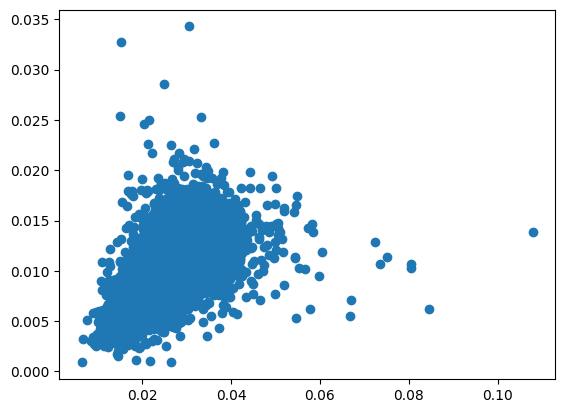

In [ ]:
plt.scatter(lsoa_yearly.f_fats_oils,lsoa_yearly.f_eggs)

In [ ]:
from sklearn.decomposition import PCA
pca_product = PCA(n_components=2)
pca_analysis = pca_product.fit_transform(lsoa_yearly)

In [ ]:
pca_feature = pd.DataFrame(data = pca_analysis
             , columns = ['f1', 'f2'])
pca_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4833 entries, 0 to 4832
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      4833 non-null   float64
 1   f2      4833 non-null   float64
dtypes: float64(2)
memory usage: 75.6 KB


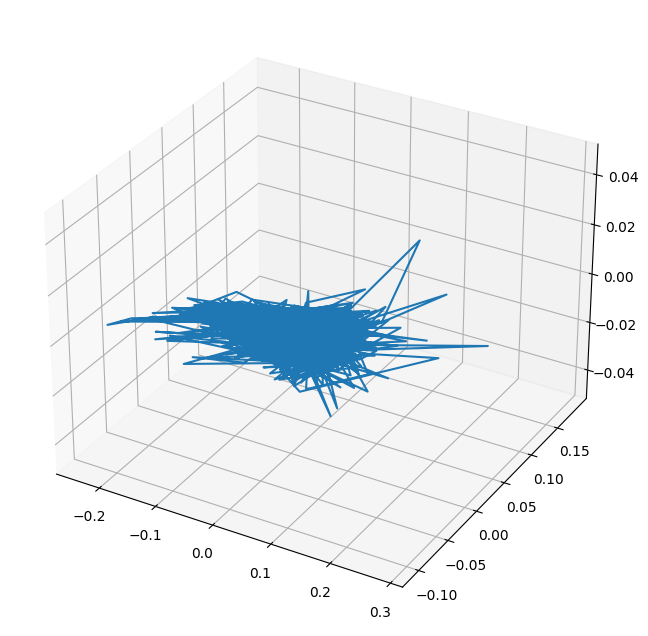

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.plot(pca_feature.f1,pca_feature.f2)

In [114]:
lsoa_T = lsoa_yearly.transpose()
lsoa_T.head()

,0,1,2,3,4,5,6,7,8,9,...,4823,4824,4825,4826,4827,4828,4829,4830,4831,4832
f_beer,0.014692,0.019417,0.030823,0.016457,0.008197,0.007705,0.010769,0.008631,0.011028,0.018905,...,0.010504,0.013001,0.018124,0.029779,0.017750,0.028153,0.016529,0.011198,0.008944,0.019300
f_dairy,0.139007,0.112283,0.126962,0.115883,0.103753,0.098052,0.119590,0.105202,0.093619,0.097641,...,0.100883,0.091884,0.124309,0.113825,0.117297,0.110232,0.102917,0.108129,0.109585,0.099164
f_eggs,0.012222,0.011716,0.009050,0.011265,0.014835,0.012669,0.010150,0.012546,0.011939,0.010889,...,0.013947,0.010373,0.014714,0.013386,0.013457,0.014863,0.012607,0.011959,0.013213,0.011293
f_fats_oils,0.022962,0.017708,0.020776,0.025449,0.032810,0.032100,0.039726,0.033189,0.029789,0.034997,...,0.030692,0.021482,0.029358,0.029234,0.029467,0.033388,0.031375,0.031860,0.034420,0.033893
f_fish,0.022754,0.024524,0.014501,0.021492,0.015971,0.017207,0.016333,0.014622,0.023574,0.022232,...,0.016652,0.019344,0.021277,0.018154,0.016245,0.019666,0.017130,0.019329,0.018746,0.033031


In [ ]:
lsoa_T = pd.read_csv('/content/lsoa_T.csv')
lsoa_T.head()

,product_id,0,1,2,3,4,5,6,7,8,...,4823,4824,4825,4826,4827,4828,4829,4830,4831,4832
0,f_beer,0.014692,0.019417,0.030823,0.016457,0.008197,0.007705,0.010769,0.008631,0.011028,...,0.010504,0.013001,0.018124,0.029779,0.017750,0.028153,0.016529,0.011198,0.008944,0.019300
1,f_dairy,0.139007,0.112283,0.126962,0.115883,0.103753,0.098052,0.119590,0.105202,0.093619,...,0.100883,0.091884,0.124309,0.113825,0.117297,0.110232,0.102917,0.108129,0.109585,0.099164
2,f_eggs,0.012222,0.011716,0.009050,0.011265,0.014835,0.012669,0.010150,0.012546,0.011939,...,0.013947,0.010373,0.014714,0.013386,0.013457,0.014863,0.012607,0.011959,0.013213,0.011293
3,f_fats_oils,0.022962,0.017708,0.020776,0.025449,0.032810,0.032100,0.039726,0.033189,0.029789,...,0.030692,0.021482,0.029358,0.029234,0.029467,0.033388,0.031375,0.031860,0.034420,0.033893
4,f_fish,0.022754,0.024524,0.014501,0.021492,0.015971,0.017207,0.016333,0.014622,0.023574,...,0.016652,0.019344,0.021277,0.018154,0.016245,0.019666,0.017130,0.019329,0.018746,0.033031


In [ ]:
pca_product = PCA(n_components=2)
pca_analysis = pca_product.fit_transform(lsoa_T.iloc[:,1:])
pca_feature = pd.DataFrame(data = pca_analysis
             , columns = ['f1', 'f2'])
pca_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      17 non-null     float64
 1   f2      17 non-null     float64
dtypes: float64(2)
memory usage: 400.0 bytes


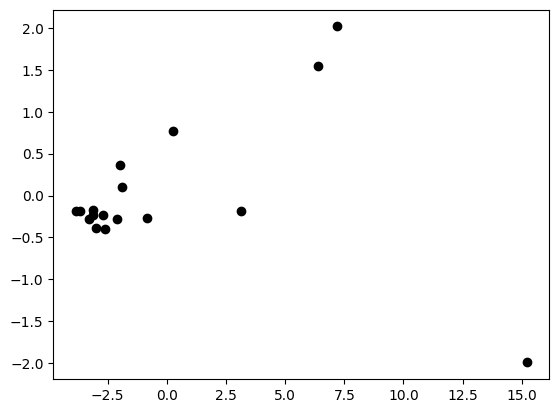

In [ ]:
plt.scatter(pca_feature.f1,pca_feature.f2,c='black')

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
lsoa_T.iloc[:,0] = labelencoder.fit_transform(lsoa_T.iloc[:,0])
lsoa_T.head()

,product_id,0,1,2,3,4,5,6,7,8,...,4823,4824,4825,4826,4827,4828,4829,4830,4831,4832
0,0,0.014692,0.019417,0.030823,0.016457,0.008197,0.007705,0.010769,0.008631,0.011028,...,0.010504,0.013001,0.018124,0.029779,0.017750,0.028153,0.016529,0.011198,0.008944,0.019300
1,1,0.139007,0.112283,0.126962,0.115883,0.103753,0.098052,0.119590,0.105202,0.093619,...,0.100883,0.091884,0.124309,0.113825,0.117297,0.110232,0.102917,0.108129,0.109585,0.099164
2,2,0.012222,0.011716,0.009050,0.011265,0.014835,0.012669,0.010150,0.012546,0.011939,...,0.013947,0.010373,0.014714,0.013386,0.013457,0.014863,0.012607,0.011959,0.013213,0.011293
3,3,0.022962,0.017708,0.020776,0.025449,0.032810,0.032100,0.039726,0.033189,0.029789,...,0.030692,0.021482,0.029358,0.029234,0.029467,0.033388,0.031375,0.031860,0.034420,0.033893
4,4,0.022754,0.024524,0.014501,0.021492,0.015971,0.017207,0.016333,0.014622,0.023574,...,0.016652,0.019344,0.021277,0.018154,0.016245,0.019666,0.017130,0.019329,0.018746,0.033031


In [ ]:
k_lsoa = lsoa_T.drop(columns=['product_id'])
k_lsoa.head()

,0,1,2,3,4,5,6,7,8,9,...,4823,4824,4825,4826,4827,4828,4829,4830,4831,4832
0,0.014692,0.019417,0.030823,0.016457,0.008197,0.007705,0.010769,0.008631,0.011028,0.018905,...,0.010504,0.013001,0.018124,0.029779,0.017750,0.028153,0.016529,0.011198,0.008944,0.019300
1,0.139007,0.112283,0.126962,0.115883,0.103753,0.098052,0.119590,0.105202,0.093619,0.097641,...,0.100883,0.091884,0.124309,0.113825,0.117297,0.110232,0.102917,0.108129,0.109585,0.099164
2,0.012222,0.011716,0.009050,0.011265,0.014835,0.012669,0.010150,0.012546,0.011939,0.010889,...,0.013947,0.010373,0.014714,0.013386,0.013457,0.014863,0.012607,0.011959,0.013213,0.011293
3,0.022962,0.017708,0.020776,0.025449,0.032810,0.032100,0.039726,0.033189,0.029789,0.034997,...,0.030692,0.021482,0.029358,0.029234,0.029467,0.033388,0.031375,0.031860,0.034420,0.033893
4,0.022754,0.024524,0.014501,0.021492,0.015971,0.017207,0.016333,0.014622,0.023574,0.022232,...,0.016652,0.019344,0.021277,0.018154,0.016245,0.019666,0.017130,0.019329,0.018746,0.033031


In [ ]:
from sklearn.cluster import KMeans
wccs = []
for k in range(1,11,1):
  kmeans = KMeans(n_clusters=k, random_state=0, init="k-means++",n_init=10).fit(k_lsoa)
  wccs.append(kmeans.inertia_)
#kmeans.labels_

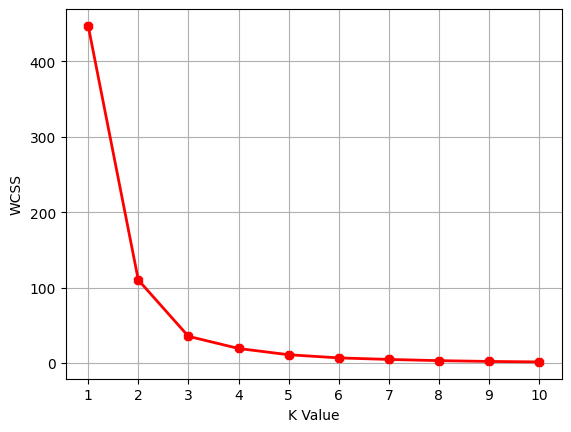

In [ ]:
plt.grid()
plt.plot(range(1,11),wccs, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0, init="k-means++",n_init=10).fit(k_lsoa)
kmeans.labels_

In [ ]:
lsoa_T['cluster'] = kmeans.labels_.T

In [ ]:
abc = lsoa_T[['product_id','cluster']]
abc.sort_values(by=['cluster']).head(17)

,product_id,cluster
0,f_beer,0
14,f_tea_coffee,0
12,f_spirits,0
11,f_soft_drinks,0
10,f_sauces,0
15,f_water,0
7,f_meat_red,0
8,f_poultry,0
4,f_fish,0
3,f_fats_oils,0


In [ ]:
lsoa_T['total'] = lsoa_T.iloc[:,1:-1].sum(axis=1)

In [ ]:
lsoa_T.head()

,product_id,0,1,2,3,4,5,6,7,8,...,4825,4826,4827,4828,4829,4830,4831,4832,cluster,total
0,f_beer,0.014692,0.019417,0.030823,0.016457,0.008197,0.007705,0.010769,0.008631,0.011028,...,0.018124,0.029779,0.017750,0.028153,0.016529,0.011198,0.008944,0.019300,0,67.303816
1,f_dairy,0.139007,0.112283,0.126962,0.115883,0.103753,0.098052,0.119590,0.105202,0.093619,...,0.124309,0.113825,0.117297,0.110232,0.102917,0.108129,0.109585,0.099164,3,501.366822
2,f_eggs,0.012222,0.011716,0.009050,0.011265,0.014835,0.012669,0.010150,0.012546,0.011939,...,0.014714,0.013386,0.013457,0.014863,0.012607,0.011959,0.013213,0.011293,0,53.334904
3,f_fats_oils,0.022962,0.017708,0.020776,0.025449,0.032810,0.032100,0.039726,0.033189,0.029789,...,0.029358,0.029234,0.029467,0.033388,0.031375,0.031860,0.034420,0.033893,0,138.052333
4,f_fish,0.022754,0.024524,0.014501,0.021492,0.015971,0.017207,0.016333,0.014622,0.023574,...,0.021277,0.018154,0.016245,0.019666,0.017130,0.019329,0.018746,0.033031,0,101.184967


In [ ]:
lsoa_T.to_csv('lsoa_cluster.csv')

In [116]:
lsoa_T = pd.read_csv('/content/lsoa_cluster.csv',index_col=0)
lsoa_T.head()

,product_id,0,1,2,3,4,5,6,7,8,...,4825,4826,4827,4828,4829,4830,4831,4832,cluster,total
0,f_beer,0.014692,0.019417,0.030823,0.016457,0.008197,0.007705,0.010769,0.008631,0.011028,...,0.018124,0.029779,0.017750,0.028153,0.016529,0.011198,0.008944,0.019300,0,67.303816
1,f_dairy,0.139007,0.112283,0.126962,0.115883,0.103753,0.098052,0.119590,0.105202,0.093619,...,0.124309,0.113825,0.117297,0.110232,0.102917,0.108129,0.109585,0.099164,3,501.366822
2,f_eggs,0.012222,0.011716,0.009050,0.011265,0.014835,0.012669,0.010150,0.012546,0.011939,...,0.014714,0.013386,0.013457,0.014863,0.012607,0.011959,0.013213,0.011293,0,53.334904
3,f_fats_oils,0.022962,0.017708,0.020776,0.025449,0.032810,0.032100,0.039726,0.033189,0.029789,...,0.029358,0.029234,0.029467,0.033388,0.031375,0.031860,0.034420,0.033893,0,138.052333
4,f_fish,0.022754,0.024524,0.014501,0.021492,0.015971,0.017207,0.016333,0.014622,0.023574,...,0.021277,0.018154,0.016245,0.019666,0.017130,0.019329,0.018746,0.033031,0,101.184967


In [117]:
lsoa_an = lsoa_T[['product_id','cluster','total']]
lsoa_an = lsoa_an.sort_values(by=['cluster'])
lsoa_an

,product_id,cluster,total
0,f_beer,0,67.303816
14,f_tea_coffee,0,29.228357
12,f_spirits,0,16.242066
11,f_soft_drinks,0,149.317714
10,f_sauces,0,67.813340
15,f_water,0,153.138387
7,f_meat_red,0,226.435571
8,f_poultry,0,94.970181
4,f_fish,0,101.184967
3,f_fats_oils,0,138.052333


In [149]:
lsoa_an['product_id'] = lsoa_an['product_id'].apply(lambda x: x.replace('f_',''))

In [153]:
lsoa_an.groupby('cluster')['total'].mean()

cluster
0      97.773267
1     761.487900
2    1331.096083
3     402.824458
Name: total, dtype: float64

In [151]:
c1 = lsoa_an.loc[lsoa_an['cluster']==0]
c2 = lsoa_an.loc[lsoa_an['cluster']==1]
c3 = lsoa_an.loc[lsoa_an['cluster']==2]
c4 = lsoa_an.loc[lsoa_an['cluster']==3]
c4.head()

,product_id,cluster,total
9,readymade,3,304.282094
1,dairy,3,501.366822


In [ ]:
lsoa_an.to_csv('cluste_named.csv')

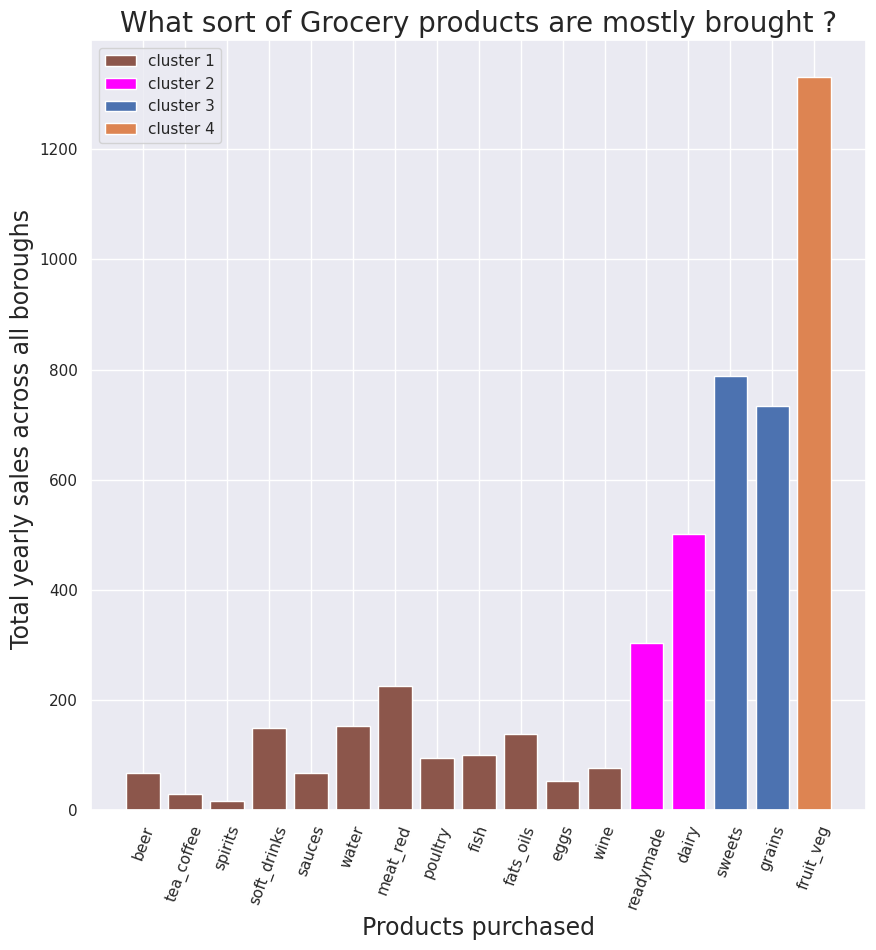

In [155]:
plt.bar(c1.product_id,c1.total,color='tab:brown',label='cluster 1 --> mean sales')
plt.bar(c4.product_id,c4.total,color='magenta',label='cluster 2')
plt.bar(c2.product_id,c2.total,label='cluster 3')
plt.bar(c3.product_id,c3.total,label='cluster 4')
plt.xticks(rotation = 70)
plt.legend()
plt.xlabel('Products purchased',fontsize=17)
plt.ylabel('Total yearly sales across all boroughs ',fontsize=17)
plt.title('What sort of Grocery products are mostly brought ?',fontsize=20)
plt.show()

# **Task 3**

In [46]:
income_df = pd.read_csv('/content/net_income.csv',encoding='unicode_escape')
income_df.head()

,MSOA code,MSOA name,Local authority code,Local authority name,Region code,Region name,Net annual income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£)
0,E02004297,County Durham 001,E06000047,County Durham,E12000001,North East,"27,300","33,700","22,100","11,700"
1,E02004290,County Durham 002,E06000047,County Durham,E12000001,North East,"29,800","37,000","23,900","13,100"
2,E02004298,County Durham 003,E06000047,County Durham,E12000001,North East,"28,300","35,100","22,800","12,300"
3,E02004299,County Durham 004,E06000047,County Durham,E12000001,North East,"26,600","32,800","21,600","11,200"
4,E02004291,County Durham 005,E06000047,County Durham,E12000001,North East,"25,500","31,400","20,700","10,800"


In [47]:
income_df = income_df.drop(columns=['Local authority code','Region code','MSOA name','Region name'])
income_df = income_df.rename(columns={'MSOA code':'area_id'})
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7202 entries, 0 to 7201
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   area_id                     7202 non-null   object
 1   Local authority name        7201 non-null   object
 2   Net annual income (£)       7201 non-null   object
 3   Upper confidence limit (£)  7201 non-null   object
 4   Lower confidence limit (£)  7201 non-null   object
 5   Confidence interval (£)     7201 non-null   object
dtypes: object(6)
memory usage: 337.7+ KB


In [48]:
msoa_geo = gpd.read_file('/content/MSOA_2011_London_gen_MHW.shp')
msoa_geo.head()

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647...."
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19..."
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18..."
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18..."
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18..."


In [49]:
msoa_geo = msoa_geo.rename(columns={'MSOA11CD':'area_id'})
msoa_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   area_id    983 non-null    object  
 1   MSOA11NM   983 non-null    object  
 2   LAD11CD    983 non-null    object  
 3   LAD11NM    983 non-null    object  
 4   RGN11CD    983 non-null    object  
 5   RGN11NM    983 non-null    object  
 6   USUALRES   983 non-null    int64   
 7   HHOLDRES   983 non-null    int64   
 8   COMESTRES  983 non-null    int64   
 9   POPDEN     983 non-null    float64 
 10  HHOLDS     983 non-null    int64   
 11  AVHHOLDSZ  983 non-null    float64 
 12  geometry   983 non-null    geometry
dtypes: float64(2), geometry(1), int64(4), object(6)
memory usage: 100.0+ KB


In [50]:
income_geo = msoa_geo.merge(income_df,on='area_id')
income_geo.head()

,area_id,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,Local authority name,Net annual income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£)
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647....",City of London,"43,300","56,200","33,300","22,900"
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19...",Barking and Dagenham,"30,600","37,600","24,900","12,700"
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18...",Barking and Dagenham,"35,100","43,100","28,500","14,600"
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18...",Barking and Dagenham,"37,000","45,500","30,100","15,400"
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18...",Barking and Dagenham,"32,800","40,500","26,600","13,900"


In [51]:
income_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 983 entries, 0 to 982
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   area_id                     983 non-null    object  
 1   MSOA11NM                    983 non-null    object  
 2   LAD11CD                     983 non-null    object  
 3   LAD11NM                     983 non-null    object  
 4   RGN11CD                     983 non-null    object  
 5   RGN11NM                     983 non-null    object  
 6   USUALRES                    983 non-null    int64   
 7   HHOLDRES                    983 non-null    int64   
 8   COMESTRES                   983 non-null    int64   
 9   POPDEN                      983 non-null    float64 
 10  HHOLDS                      983 non-null    int64   
 11  AVHHOLDSZ                   983 non-null    float64 
 12  geometry                    983 non-null    geometry
 13  Local author

In [52]:
df = income_geo[['Net annual income (£)','Upper confidence limit (£)','Lower confidence limit (£)','Confidence interval (£)']]
df['Net annual income (£)'] = df['Net annual income (£)'].apply(lambda x: x.replace(',',''))
df['Upper confidence limit (£)'] = df['Upper confidence limit (£)'].apply(lambda x: x.replace(',',''))
df['Lower confidence limit (£)'] = df['Lower confidence limit (£)'].apply(lambda x: x.replace(',',''))
df['Confidence interval (£)'] = df['Confidence interval (£)'].apply(lambda x: x.replace(',',''))
df = df.astype('int32')
df.head()

<ipython-input-52-9d3746f08b22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Net annual income (£)'] = df['Net annual income (£)'].apply(lambda x: x.replace(',',''))
<ipython-input-52-9d3746f08b22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Upper confidence limit (£)'] = df['Upper confidence limit (£)'].apply(lambda x: x.replace(',',''))
<ipython-input-52-9d3746f08b22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,Net annual income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£)
0,43300,56200,33300,22900
1,30600,37600,24900,12700
2,35100,43100,28500,14600
3,37000,45500,30100,15400
4,32800,40500,26600,13900


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 982
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Net annual income (£)       983 non-null    int32
 1   Upper confidence limit (£)  983 non-null    int32
 2   Lower confidence limit (£)  983 non-null    int32
 3   Confidence interval (£)     983 non-null    int32
dtypes: int32(4)
memory usage: 23.0 KB


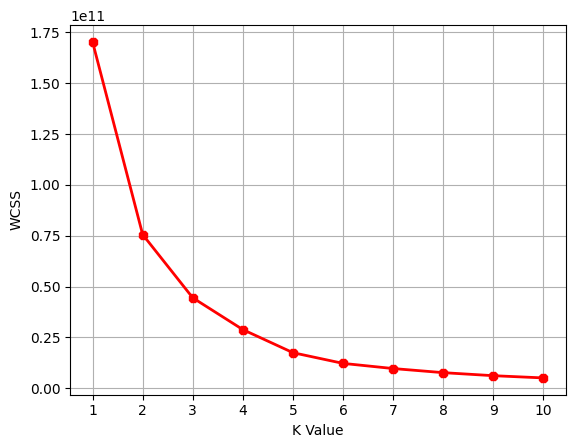

In [ ]:
from sklearn.cluster import KMeans
wccs = []
for k in range(1,11,1):
  kmeans = KMeans(n_clusters=k, random_state=0, init="k-means++",n_init=10).fit(df)
  wccs.append(kmeans.inertia_)
#kmeans.labels_
plt.grid()
plt.plot(range(1,11),wccs, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [55]:
kmeans = KMeans(n_clusters=4, random_state=0, init="k-means++",n_init=10).fit(df)
df['cluster'] = kmeans.labels_
df.head()

,Net annual income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£),cluster
0,43300,56200,33300,22900,0
1,30600,37600,24900,12700,2
2,35100,43100,28500,14600,2
3,37000,45500,30100,15400,2
4,32800,40500,26600,13900,2


In [56]:
in_2015 = df.groupby('cluster')['Net annual income (£)'].mean().reset_index()
in_2015.head()

,cluster,Net annual income (£)
0,0,41507.075472
1,1,51641.538462
2,2,34417.176471
3,3,84125.000000


In [187]:
df.head()

,Net annual income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£),cluster
0,43300,56200,33300,22900,0
1,30600,37600,24900,12700,2
2,35100,43100,28500,14600,2
3,37000,45500,30100,15400,2
4,32800,40500,26600,13900,2


In [57]:
income_geo['cluster'] = kmeans.labels_
income_geo.head()

,area_id,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,Local authority name,Net annual income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£),cluster
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647....",City of London,"43,300","56,200","33,300","22,900",0
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19...",Barking and Dagenham,"30,600","37,600","24,900","12,700",2
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18...",Barking and Dagenham,"35,100","43,100","28,500","14,600",2
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18...",Barking and Dagenham,"37,000","45,500","30,100","15,400",2
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18...",Barking and Dagenham,"32,800","40,500","26,600","13,900",2


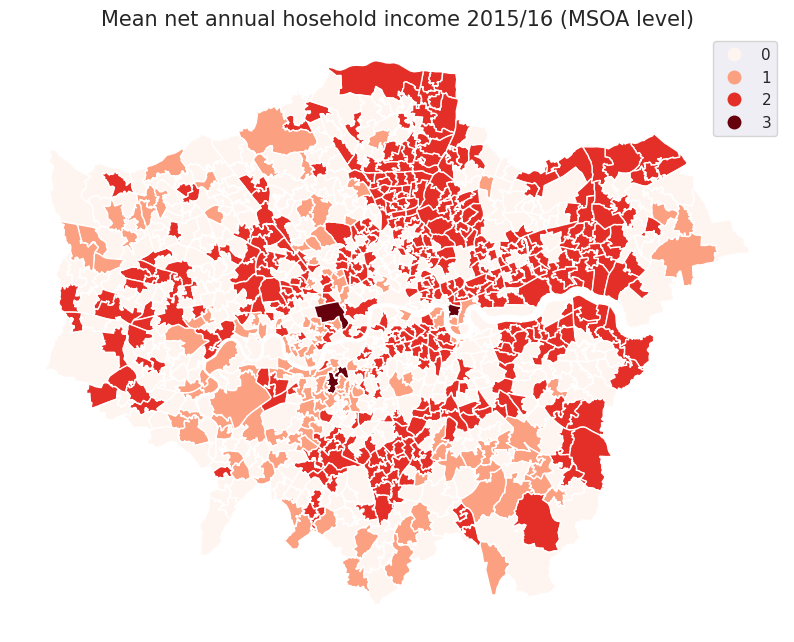

In [193]:
ax = income_geo.plot(column='cluster',cmap='Reds',categorical=True,legend=True)
plt.title('Mean net annual hosehold income 2015/16 (MSOA level)',fontsize=15)

ax.set_axis_off()

In [214]:
income_geo.loc[df['cluster']==3]

,area_id,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,Local authority name,Net annual income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£)
898,E02000931,Wandsworth 009,E09000032,Wandsworth,E12000007,London,8474,8474,0,106.5,3532,2.4,"POLYGON ((528091.166 175661.140, 528073.000 17...",Wandsworth,"75,200","95,900","59,000","36,900"
904,E02000937,Wandsworth 015,E09000032,Wandsworth,E12000007,London,7724,7711,13,62.6,3130,2.5,"POLYGON ((527377.574 175190.744, 527261.056 17...",Wandsworth,"79,300","1,02,600","61,200","41,400"
945,E02000978,Westminster 019,E09000033,Westminster,E12000007,London,9270,7862,1408,25.8,3882,2.0,"POLYGON ((528427.719 180115.109, 528410.126 17...",Westminster,"88,200","1,25,500","62,000","63,600"
972,E02006854,Tower Hamlets 033,E09000030,Tower Hamlets,E12000007,London,5883,5883,0,64.4,2991,2.0,"POLYGON ((537706.800 180604.299, 537968.203 18...",Tower Hamlets,"93,800","1,27,600","68,900","58,800"


In [ ]:
income_geo.to_csv('income_geo_cluster.csv')

In [215]:
income_18 = pd.read_csv('/content/netannualincome20181.csv',encoding='unicode_escape')
income_18.head()

,MSOA code,MSOA name,Local authority code,Local authority name,Region code,Region name,Net annual income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£)
0,E02004297,County Durham 001,E06000047,County Durham,E12000001,North East,"32,200","37,900","27,400","10,500"
1,E02004290,County Durham 002,E06000047,County Durham,E12000001,North East,"33,000","39,000","28,000","11,000"
2,E02004298,County Durham 003,E06000047,County Durham,E12000001,North East,"31,700","37,200","27,000","10,200"
3,E02004299,County Durham 004,E06000047,County Durham,E12000001,North East,"27,700","32,600","23,600","9,000"
4,E02004291,County Durham 005,E06000047,County Durham,E12000001,North East,"30,400","35,700","25,800","9,900"


In [216]:
income_18 = income_18.drop(columns=['Local authority code','Region code','MSOA name','Region name'])
income_18 = income_18.rename(columns={'MSOA code':'area_id'})
income_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7201 entries, 0 to 7200
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   area_id                     7201 non-null   object
 1   Local authority name        7201 non-null   object
 2   Net annual income (£)       7201 non-null   object
 3   Upper confidence limit (£)  7201 non-null   object
 4   Lower confidence limit (£)  7201 non-null   object
 5   Confidence interval (£)     7201 non-null   object
dtypes: object(6)
memory usage: 337.7+ KB


In [217]:
income_geo = msoa_geo.merge(income_18,on='area_id')
income_geo.head()

,area_id,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,Local authority name,Net annual income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£)
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647....",City of London,"47,200","57,600","38,700","18,900"
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19...",Barking and Dagenham,"32,200","37,800","27,400","10,400"
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18...",Barking and Dagenham,"37,800","44,200","32,300","11,900"
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18...",Barking and Dagenham,"35,300","41,400","30,000","11,400"
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18...",Barking and Dagenham,"37,800","44,400","32,300","12,100"


In [218]:
df = income_geo[['Net annual income (£)','Upper confidence limit (£)','Lower confidence limit (£)','Confidence interval (£)']]
df['Net annual income (£)'] = df['Net annual income (£)'].apply(lambda x: x.replace(',',''))
df['Upper confidence limit (£)'] = df['Upper confidence limit (£)'].apply(lambda x: x.replace(',',''))
df['Lower confidence limit (£)'] = df['Lower confidence limit (£)'].apply(lambda x: x.replace(',',''))
df['Confidence interval (£)'] = df['Confidence interval (£)'].apply(lambda x: x.replace(',',''))
df = df.astype('int32')
df.head()

<ipython-input-218-9d3746f08b22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Net annual income (£)'] = df['Net annual income (£)'].apply(lambda x: x.replace(',',''))
<ipython-input-218-9d3746f08b22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Upper confidence limit (£)'] = df['Upper confidence limit (£)'].apply(lambda x: x.replace(',',''))
<ipython-input-218-9d3746f08b22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,Net annual income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£)
0,47200,57600,38700,18900
1,32200,37800,27400,10400
2,37800,44200,32300,11900
3,35300,41400,30000,11400
4,37800,44400,32300,12100


In [219]:
kmeans = KMeans(n_clusters=3, random_state=0, init="k-means++",n_init=10).fit(df)
df['cluster'] = kmeans.labels_
df.head()

,Net annual income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£),cluster
0,47200,57600,38700,18900,2
1,32200,37800,27400,10400,1
2,37800,44200,32300,11900,1
3,35300,41400,30000,11400,1
4,37800,44400,32300,12100,1


In [248]:
in_2018 = df.groupby('cluster')['Net annual income (£)'].mean().reset_index()
in_2018.head()

,cluster,Net annual income (£)
0,0,44114.953271
1,1,37302.754821
2,2,51870.312500


In [252]:
in_2018 = pd.read_csv('/content/2018_mean.csv')
in_2018.head()

,cluster,Net annual income 2018 (£)
0,0,44114.95327
1,2,37302.75482
2,1,51870.31250


In [237]:
df.loc[df['Net annual income (£)']>60000]

,Net annual income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£),cluster
262,61900,73200,52400,20800,2
264,61600,72500,52200,20300,2
571,62600,82400,47500,34900,2
672,60900,72000,51600,20400,2
760,63700,78200,51900,26300,2
762,63400,79300,50700,28600,2
767,63000,77700,51100,26600,2
914,60400,72100,50700,21400,2


In [221]:
income_geo['cluster'] = kmeans.labels_
income_geo.head()

,area_id,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,Local authority name,Net annual income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£),cluster
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647....",City of London,"47,200","57,600","38,700","18,900",2
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19...",Barking and Dagenham,"32,200","37,800","27,400","10,400",1
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18...",Barking and Dagenham,"37,800","44,200","32,300","11,900",1
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18...",Barking and Dagenham,"35,300","41,400","30,000","11,400",1
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18...",Barking and Dagenham,"37,800","44,400","32,300","12,100",1


In [228]:
income_geo.loc[income_geo['MSOA11NM'].str.contains('Wandsworth 009|Wandsworth 015|Westminster 019|Tower Hamlets 033')]

,area_id,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,Local authority name,Net annual income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£),cluster
898,E02000931,Wandsworth 009,E09000032,Wandsworth,E12000007,London,8474,8474,0,106.5,3532,2.4,"POLYGON ((528091.166 175661.140, 528073.000 17...",Wandsworth,"53,300","65,100","43,600","21,500",2
904,E02000937,Wandsworth 015,E09000032,Wandsworth,E12000007,London,7724,7711,13,62.6,3130,2.5,"POLYGON ((527377.574 175190.744, 527261.056 17...",Wandsworth,"56,700","67,500","47,600","19,900",2
945,E02000978,Westminster 019,E09000033,Westminster,E12000007,London,9270,7862,1408,25.8,3882,2.0,"POLYGON ((528427.719 180115.109, 528410.126 17...",Westminster,"32,600","41,800","25,300","16,500",1
972,E02006854,Tower Hamlets 033,E09000030,Tower Hamlets,E12000007,London,5883,5883,0,64.4,2991,2.0,"POLYGON ((537706.800 180604.299, 537968.203 18...",Tower Hamlets,"55,000","68,800","43,900","24,900",2


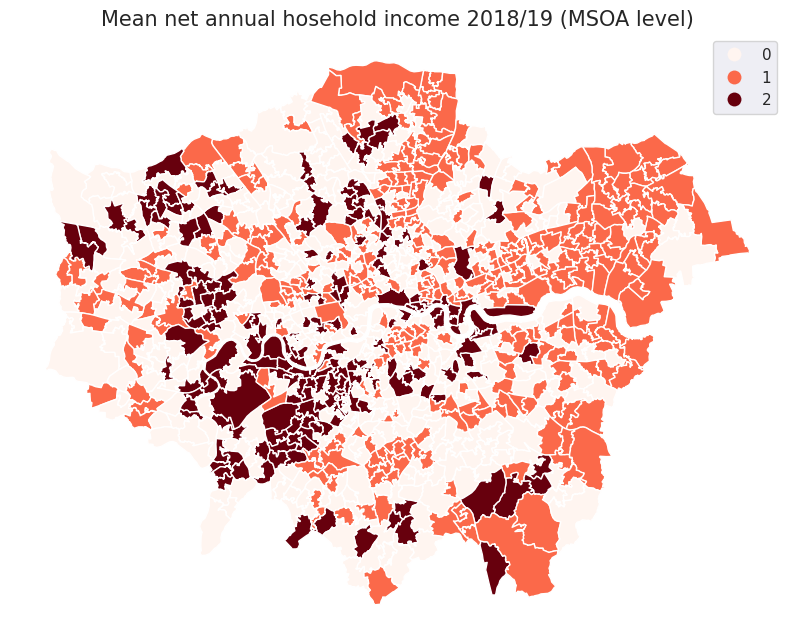

In [204]:
ax = income_geo.plot(column='cluster',cmap='Reds',categorical=True,legend=True)
plt.title('Mean net annual hosehold income 2018/19 (MSOA level)',fontsize=15)

ax.set_axis_off()

In [239]:
income_geo.loc[income_geo['Net annual income (£)'].str.contains('63')]

,area_id,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,Local authority name,Net annual income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£),cluster
760,E02000790,Richmond upon Thames 007,E09000027,Richmond upon Thames,E12000007,London,6193,6193,0,77.6,2609,2.4,"POLYGON ((517019.156 174347.703, 517035.774 17...",Richmond upon Thames,"63,700","78,200","51,900","26,300",2
762,E02000792,Richmond upon Thames 009,E09000027,Richmond upon Thames,E12000007,London,6989,6832,157,56.1,3209,2.1,"POLYGON ((517687.857 174487.540, 517656.800 17...",Richmond upon Thames,"63,400","79,300","50,700","28,600",2
767,E02000797,Richmond upon Thames 014,E09000027,Richmond upon Thames,E12000007,London,6979,6894,85,76.4,3273,2.1,"MULTIPOLYGON (((516779.300 173229.000, 516507....",Richmond upon Thames,"63,000","77,700","51,100","26,600",2


In [35]:
comb = pd.read_csv('/content/mean_income_15_18.csv',index_col=0)
comb.head()

,cluster,Net annual income (£),Net annual income 2018 (£)
2,2,34417.17647,37302.75482
0,0,41507.07547,44114.95327
1,1,51641.53846,51870.31250
3,3,84125.00000,NaN


In [36]:
comb = comb.fillna(0)
comb = comb.rename(columns={'Net annual income (£)':'Net annual income 2015 (£)'})
comb['Net annual income 2015 (£)'] = comb['Net annual income 2015 (£)'].astype('int32')
comb['Net annual income 2018 (£)'] = comb['Net annual income 2018 (£)'].astype('int32')
comb['Net annual income 2018 (£)'] = comb['Net annual income 2018 (£)'].replace(0,np.nan)

comb.head()

,cluster,Net annual income 2015 (£),Net annual income 2018 (£)
2,2,34417,37302.0
0,0,41507,44114.0
1,1,51641,51870.0
3,3,84125,NaN


[]

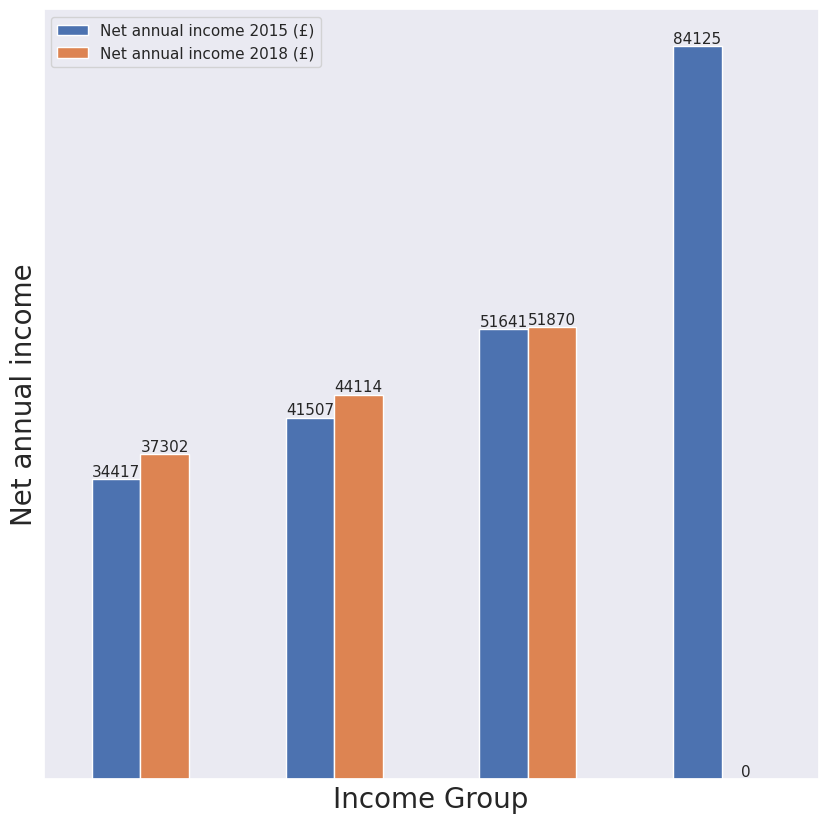

In [41]:
ax = comb.plot.bar(x='cluster',y=['Net annual income 2015 (£)','Net annual income 2018 (£)'])
for container in ax.containers:
    ax.bar_label(container,fontsize=11)
plt.xlabel('Income Group',fontsize=20)
plt.ylabel('Net annual income',fontsize=20)
plt.xticks(rotation = 0)
ax.set_yticks([])
ax.set_xticks([])

In [259]:
comb.to_csv('mean_income_15_18.csv')

In [59]:
msoa = pd.read_csv('/content/year_msoa_grocery.csv',usecols=['area_id', 'weight','volume','fat','saturate','salt','sugar','protein','carb','fibre','alcohol',
                                 'energy_tot','h_nutrients_calories','f_beer', 'f_dairy', 'f_eggs', 'f_fats_oils', 'f_fish', 
                                  'f_fruit_veg', 'f_grains', 'f_meat_red', 'f_poultry', 'f_readymade', 'f_sauces', 
                                  'f_soft_drinks', 'f_spirits', 'f_sweets', 'f_tea_coffee', 'f_water', 'f_wine',
                                  'transaction_days', 'num_transactions', 'man_day', 'population', 'male', 'female',
                                  'age_0_17', 'age_18_64', 'age_65+', 'avg_age', 'area_sq_km', 'people_per_sq_km'])
msoa.head()

,area_id,weight,volume,fat,saturate,salt,sugar,protein,carb,fibre,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
0,E02000001,323.180804,98.849228,8.473746,3.361873,0.530467,9.278385,5.253099,15.779311,1.619871,...,103934,6687.0,3697.0,2990.0,1018.0,4349.0,1320.0,43.910124,2.90,2305.862069
1,E02000002,397.651232,118.288417,8.985044,3.454481,0.561358,10.859950,5.015294,19.794459,1.615575,...,9952,7379.0,3549.0,3830.0,2150.0,4151.0,1078.0,35.567286,2.16,3416.203704
2,E02000003,371.276702,118.385615,9.672637,3.872347,0.530420,12.757477,4.987696,21.120739,1.602994,...,19576,10720.0,5297.0,5423.0,2762.0,6649.0,1309.0,35.700466,2.14,5009.345794
3,E02000004,347.481292,104.435407,9.250666,3.532561,0.580649,11.353290,5.398464,20.057665,1.618857,...,10689,6536.0,3119.0,3417.0,1454.0,4044.0,1038.0,38.493115,2.48,2635.483871
4,E02000005,400.576688,128.997438,9.319950,3.673907,0.578078,11.692790,4.977404,20.151384,1.603659,...,15071,9243.0,4478.0,4765.0,2678.0,5554.0,1011.0,34.156335,1.19,7767.226891


**analysis on economic aspects wrt population**

In [69]:
df_age = msoa[['area_id','transaction_days', 'num_transactions','population','avg_age', 'area_sq_km', 'people_per_sq_km']]

In [70]:
df_age = df_age.merge(income_geo[['area_id','cluster']],on='area_id')
df_age.head()

,area_id,transaction_days,num_transactions,population,avg_age,area_sq_km,people_per_sq_km,cluster
0,E02000001,365,842421.0,6687.0,43.910124,2.90,2305.862069,0
1,E02000002,364,76033.0,7379.0,35.567286,2.16,3416.203704,2
2,E02000003,364,142634.0,10720.0,35.700466,2.14,5009.345794,2
3,E02000004,364,74171.0,6536.0,38.493115,2.48,2635.483871,2
4,E02000005,364,122708.0,9243.0,34.156335,1.19,7767.226891,2


In [62]:
df_age[['avg_age']].describe()

,avg_age
count,983.000000
mean,36.115975
std,3.210194
min,27.318187
25%,33.904052
50%,35.715132
75%,38.014956
max,45.464540


In [63]:
df_age[['people_per_sq_km','cluster']].groupby('cluster').describe() # obs - low income areas have higher people per square 

people_per_sq_km                                                       \
                   count          mean          std          min          25%   
cluster                                                                         
0                  424.0   8027.125064  4757.024589   288.324421  4831.700015   
1                  130.0   7662.238416  5163.348951   572.350993  3673.707865   
2                  425.0  10043.524497  5272.253156   547.570533  5723.529412   
3                    4.0   7387.666915  3687.762208  2898.055556  5709.594534   

                                                  
                 50%           75%           max  
cluster                                           
0        6716.662399  10379.359568  26905.405405  
1        6163.695204  11055.708829  23977.777778  
2        9217.391304  14115.384615  26236.538462  
3        7429.431053   9107.503434  11793.750000

In [73]:
cluster_shopping = df_age[['num_transactions','cluster']].groupby('cluster').mean().reset_index() # low income cluster prefers shopping from tesco more
cluster_shopping.head()

,cluster,num_transactions
0,0,598912.735849
1,1,438820.261538
2,2,684229.875294
3,3,357096.500000


In [74]:
cluster_shopping.to_csv('shop_trends_in_clusters.csv')

In [75]:
cluster_shopping = pd.read_csv('/content/shop_trends_in_clusters.csv')
cluster_shopping.head()

,cluster,num_transactions,Net annual income (£)
0,2,684229.8753,34417.17647
1,0,598912.7358,41507.07547
2,1,438820.2615,51641.53846
3,3,357096.5000,84125.00000


In [109]:
cluster_shopping['Net annual income (£)'] = cluster_shopping['Net annual income (£)'].astype('int32')

Text(0, 0.5, 'Net annual income (£)')

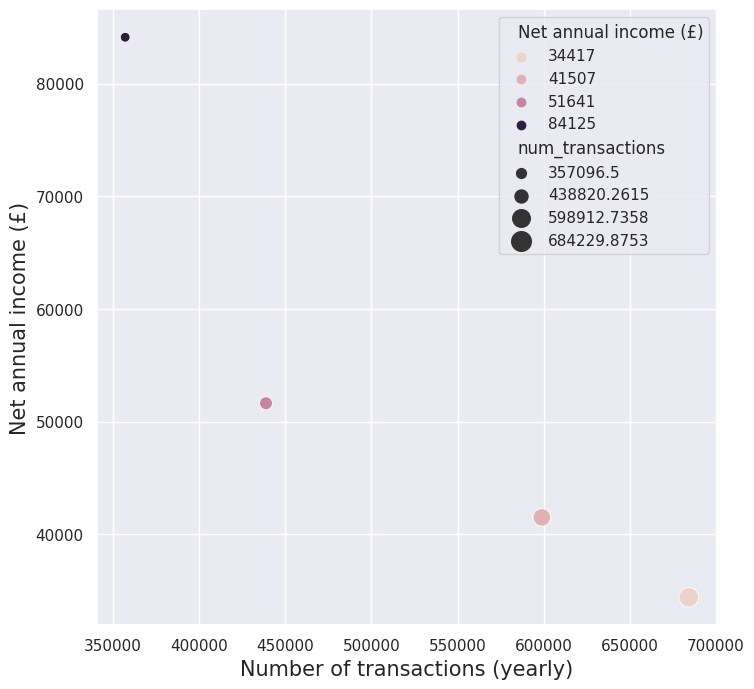

In [110]:
sns.set(rc={'figure.facecolor':'white',"figure.figsize":(8, 8)}) 

sns.scatterplot(x='num_transactions',y='Net annual income (£)',data=cluster_shopping,size='num_transactions',hue='Net annual income (£)',sizes=(50, 200)
            )
# for container in ax.containers:
#     ax.bar_label(container,fontsize=11)
plt.xlabel('Number of transactions (yearly)',fontsize=15)
plt.ylabel('Net annual income (£)',fontsize=15)


In [112]:
borough_in = pd.read_csv('/content/borough_income_2012.csv',encoding='unicode_escape')
borough_in.head()

,LAD code,Borough,Mean 2011/12,Mean 2012/13
0,E09000001,City of London,"£97,030","£99,390"
1,E09000002,Barking and Dagenham,"£37,870","£38,870"
2,E09000002,Barking and Dagenham,"£36,290","£37,290"
3,E09000002,Barking and Dagenham,"£36,930","£37,860"
4,E09000002,Barking and Dagenham,"£37,910","£38,860"


In [113]:
borough_in = borough_in.drop(columns=['Mean 2011/12'])
borough_in['Mean 2012/13'] = borough_in['Mean 2012/13'].apply(lambda x: x.replace(',',''))
borough_in['Mean 2012/13'] = borough_in['Mean 2012/13'].apply(lambda x: x.replace('£',''))
borough_in.head()

,LAD code,Borough,Mean 2012/13
0,E09000001,City of London,99390
1,E09000002,Barking and Dagenham,38870
2,E09000002,Barking and Dagenham,37290
3,E09000002,Barking and Dagenham,37860
4,E09000002,Barking and Dagenham,38860


In [114]:
borough_in['Mean 2012/13'] = borough_in['Mean 2012/13'].astype('int32')

In [115]:
income_df = borough_in.groupby('LAD code',as_index=False)['Mean 2012/13'].mean()

In [116]:
income_df.head()

,LAD code,Mean 2012/13
0,E09000001,99390.000000
1,E09000002,38488.823529
2,E09000003,53834.761905
3,E09000004,45044.761905
4,E09000005,42627.142857


In [ ]:
income_df.to_csv('borough_income_2012_mean.csv')

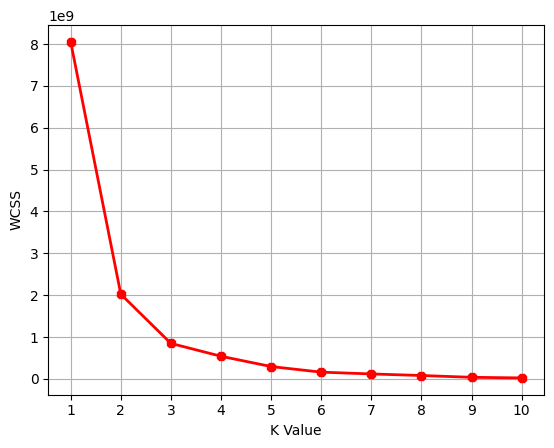

In [ ]:
wccs = []
for k in range(1,11,1):
  kmeans = KMeans(n_clusters=k, random_state=0, init="k-means++",n_init=10).fit(income_df[['Mean 2012/13']])
  wccs.append(kmeans.inertia_)
#kmeans.labels_
plt.grid()
plt.plot(range(1,11),wccs, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [117]:
kmeans = KMeans(n_clusters=4, random_state=0, init="k-means++",n_init=10).fit(income_df[['Mean 2012/13']])
income_df['cluster'] = kmeans.labels_
income_df.groupby('cluster').mean()

<ipython-input-117-3b1d93ef32cb>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  income_df.groupby('cluster').mean()


,Mean 2012/13
cluster,
0,44433.270366
1,103993.611111
2,68739.005556
3,51794.859168


In [118]:
obesity_df = pd.read_csv('/content/london_obesity_borough_2012.csv')
obesity_df.head()

,oslaua,f_healthy_weight,f_overweight,f_obese,weighted_sample
0,E09000001,36.5,30.5,31.4,20
1,E09000002,33.4,31.9,31.6,409
2,E09000003,42.1,35.2,20.5,862
3,E09000004,33.5,43.1,23.0,589
4,E09000005,43.9,34.9,19.5,712


In [119]:
income_df = income_df.rename(columns={'LAD code':'area_id'})
obesity_df = obesity_df.rename(columns={'oslaua':'area_id'})

In [120]:
obesity_in = obesity_df.merge(income_df,on='area_id')
obesity_in.head()

,area_id,f_healthy_weight,f_overweight,f_obese,weighted_sample,Mean 2012/13,cluster
0,E09000001,36.5,30.5,31.4,20,99390.000000,1
1,E09000002,33.4,31.9,31.6,409,38488.823529,0
2,E09000003,42.1,35.2,20.5,862,53834.761905,3
3,E09000004,33.5,43.1,23.0,589,45044.761905,0
4,E09000005,43.9,34.9,19.5,712,42627.142857,0


In [122]:
df_ob = obesity_in.groupby('cluster')['f_overweight'].mean().reset_index() # low income household -->> higher obese tenddency
df_ob.head()

,cluster,f_overweight
0,0,38.026667
1,1,32.600000
2,2,36.120000
3,3,37.854545


In [124]:
df = pd.read_csv('/content/df_ob.csv')
df.head()

,cluster,Percentage overweight of total sample,Net annual income (mean)
0,0,38,44433
1,3,37,51794
2,2,36,68739
3,1,32,103993


Text(0.5, 0, 'Net annual income in £ (mean)')

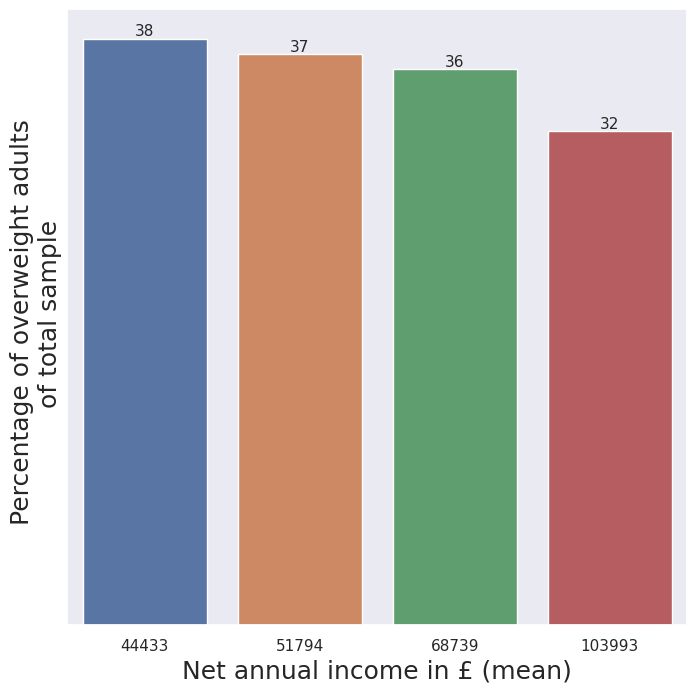

In [133]:
ax = sns.barplot(x=df['Net annual income (mean)'],y=df['Percentage overweight of total sample'],data=df)
for container in ax.containers:
    ax.bar_label(container,fontsize=11)
plt.yticks([])
plt.ylabel('Percentage of overweight adults \n of total sample',fontsize=18)
plt.xlabel('Net annual income in £ (mean)',fontsize=18)

In [123]:
df_ob.to_csv('df_ob.csv')

In [ ]:
obesity_in.to_csv('obesity_borough_income_analysis.csv')

In [138]:
df = pd.read_csv('/content/obesity_borough_income_analysis.csv',encoding='unicode_escape',index_col=0)
df.head()

,area_id,f_healthy_weight,f_overweight,f_obese,weighted_sample,Mean 2012/13,cluster,Net annual income in £ (mean),overweight mean
0,E09000001,36.5,30.5,31.4,20,99390.00000,1,103993,32
1,E09000002,33.4,31.9,31.6,409,38488.82353,0,44433,38
2,E09000003,42.1,35.2,20.5,862,53834.76190,3,51794,37
3,E09000004,33.5,43.1,23.0,589,45044.76190,0,44433,38
4,E09000005,43.9,34.9,19.5,712,42627.14286,0,44433,38


In [139]:
borough_geo = gpd.read_file('/content/London_Borough_Excluding_MHW.shp')
print(len(borough_geo))
borough_geo = borough_geo.rename(columns={'GSS_CODE':'area_id'})
borough_geo.head()

33


,NAME,area_id,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((510253.500 182881.600, 510249.900 18..."


In [140]:
df = borough_geo.merge(df,on='area_id')
print(df.info())
df.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   NAME                           33 non-null     object  
 1   area_id                        33 non-null     object  
 2   HECTARES                       33 non-null     float64 
 3   NONLD_AREA                     33 non-null     float64 
 4   ONS_INNER                      33 non-null     object  
 5   SUB_2009                       0 non-null      float64 
 6   SUB_2006                       0 non-null      float64 
 7   geometry                       33 non-null     geometry
 8   f_healthy_weight               33 non-null     float64 
 9   f_overweight                   33 non-null     float64 
 10  f_obese                        33 non-null     float64 
 11  weighted_sample                33 non-null     int64   
 12  Mean 2012/13                  

,NAME,area_id,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,f_healthy_weight,f_overweight,f_obese,weighted_sample,Mean 2012/13,cluster,Net annual income in £ (mean),overweight mean
0,Kingston upon Thames,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((516401.600 160201.800, 516407.300 16...",44.4,40.5,14.6,398,53932.50000,3,51794,37
1,Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((535009.200 159504.700, 535005.500 15...",36.6,37.7,24.3,858,46170.83333,0,44433,38
2,Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((540373.600 157530.400, 540361.200 15...",34.3,43.8,21.2,743,53099.54545,3,51794,37
3,Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((521975.800 178100.000, 521967.700 17...",35.4,41.0,21.8,628,46388.50000,0,44433,38
4,Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((510253.500 182881.600, 510249.900 18...",42.1,39.0,18.2,807,46990.43478,0,44433,38


In [141]:
df['Mean 2012/13'] = df['Mean 2012/13'].apply(lambda x : int(x))
df.head()

,NAME,area_id,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,f_healthy_weight,f_overweight,f_obese,weighted_sample,Mean 2012/13,cluster,Net annual income in £ (mean),overweight mean
0,Kingston upon Thames,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((516401.600 160201.800, 516407.300 16...",44.4,40.5,14.6,398,53932,3,51794,37
1,Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((535009.200 159504.700, 535005.500 15...",36.6,37.7,24.3,858,46170,0,44433,38
2,Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((540373.600 157530.400, 540361.200 15...",34.3,43.8,21.2,743,53099,3,51794,37
3,Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((521975.800 178100.000, 521967.700 17...",35.4,41.0,21.8,628,46388,0,44433,38
4,Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((510253.500 182881.600, 510249.900 18...",42.1,39.0,18.2,807,46990,0,44433,38


In [147]:
df['Mean 2012/13'] = df['Mean 2012/13'].apply(lambda x : '£ '+str(x))
df.head()

,NAME,area_id,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,f_healthy_weight,f_overweight,f_obese,weighted_sample,Mean 2012/13,cluster,Net annual income in £ (mean),overweight mean,coords
0,Kingston upon Thames,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((516401.600 160201.800, 516407.300 16...",44.4,40.5,14.6,398,£ 53932,3,51794,37,"(519994.2485496496, 166150.85)"
1,Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((535009.200 159504.700, 535005.500 15...",36.6,37.7,24.3,858,£ 46170,0,44433,38,"(534962.0104805692, 163446.84999999998)"
2,Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((540373.600 157530.400, 540361.200 15...",34.3,43.8,21.2,743,£ 53099,3,51794,37,"(543635.0728800413, 165067.35)"
3,Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((521975.800 178100.000, 521967.700 17...",35.4,41.0,21.8,628,£ 46388,0,44433,38,"(512742.5814, 174963.45)"
4,Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((510253.500 182881.600, 510249.900 18...",42.1,39.0,18.2,807,£ 46990,0,44433,38,"(517056.6275229358, 181946.0)"


In [142]:
df['coords'] = df['geometry'].apply(lambda x: x.representative_point().coords[:])
df['coords'] = [coords[0] for coords in df['coords']]

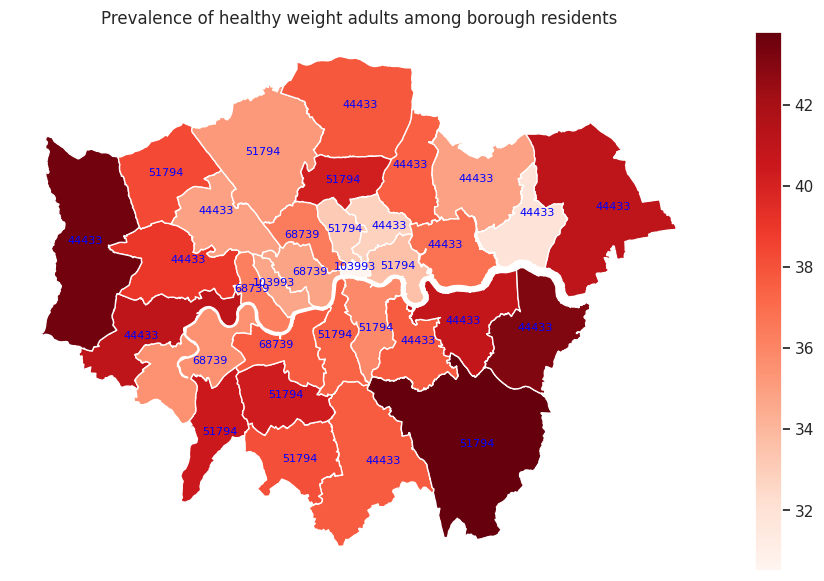

In [145]:
ax = df.plot(column='f_overweight',legend=True,cmap='Reds',figsize=[12,7])
plt.title('Prevalence of healthy weight adults among borough residents')
for idx, row in df.iterrows():
    plt.annotate(text=row['Net annual income in £ (mean)'], xy=row['coords'],
                 horizontalalignment='center',fontsize=8,color='blue')
ax.set_axis_off()

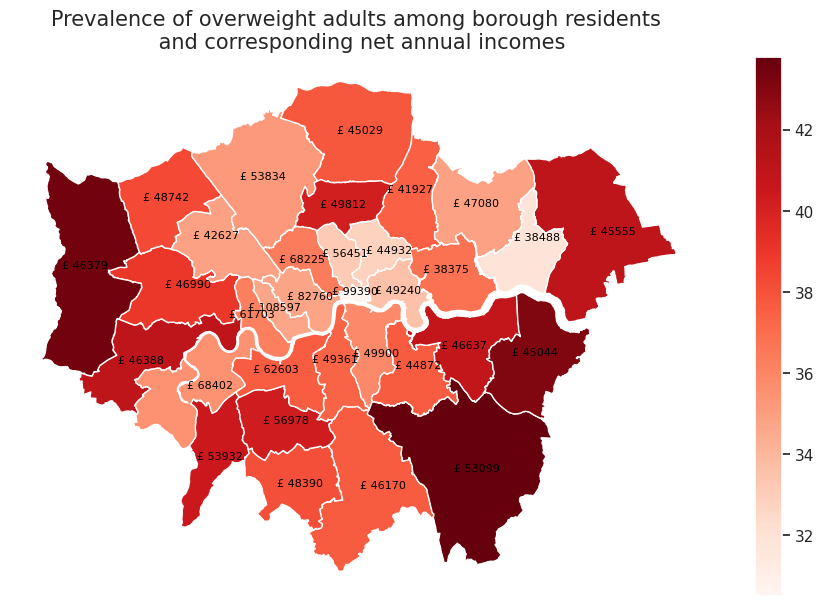

In [153]:
ax = df.plot(column='f_overweight',legend=True,cmap='Reds',figsize=[12,7])
plt.title('Prevalence of overweight adults among borough residents \n and corresponding net annual incomes',fontsize=15)
for idx, row in df.iterrows():
    plt.annotate(text=row['Mean 2012/13'], xy=row['coords'],
                 horizontalalignment='center',fontsize=9,color='black')
ax.set_axis_off()

**income order to eating habits**

In [185]:
msoa_income = pd.read_csv('/content/income_geo_cluster.csv',index_col=0)
msoa_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 982
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   area_id                     983 non-null    object 
 1   MSOA11NM                    983 non-null    object 
 2   LAD11CD                     983 non-null    object 
 3   LAD11NM                     983 non-null    object 
 4   RGN11CD                     983 non-null    object 
 5   RGN11NM                     983 non-null    object 
 6   USUALRES                    983 non-null    int64  
 7   HHOLDRES                    983 non-null    int64  
 8   COMESTRES                   983 non-null    int64  
 9   POPDEN                      983 non-null    float64
 10  HHOLDS                      983 non-null    int64  
 11  AVHHOLDSZ                   983 non-null    float64
 12  geometry                    983 non-null    object 
 13  Local authority name        983 non

In [186]:
msoa_income['Net annual income (£)'] = msoa_income['Net annual income (£)'].apply(lambda x : x.replace(',',''))
msoa_income['Net annual income (£)'] = msoa_income['Net annual income (£)'].astype('int32')
msoa_income.head()

,area_id,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,Local authority name,Net annual income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£),cluster
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,MULTIPOLYGON (((531667.624000648 180534.991999...,City of London,43300,"56,200","33,300","22,900",0
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.56299972 190845.26500046943, ...",Barking and Dagenham,30600,"37,600","24,900","12,700",2
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,POLYGON ((549102.4379997085 189324.62499962831...,Barking and Dagenham,35100,"43,100","28,500","14,600",2
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,POLYGON ((551549.9979995684 187364.63700007045...,Barking and Dagenham,37000,"45,500","30,100","15,400",2
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.6339997301 187656.076, 549161...",Barking and Dagenham,32800,"40,500","26,600","13,900",2


In [187]:
msoa_income.groupby('cluster')['Net annual income (£)'].mean()

cluster
0    41507.075472
1    51641.538462
2    34417.176471
3    84125.000000
Name: Net annual income (£), dtype: float64

In [188]:
msoa.head()

,area_id,weight,volume,fat,saturate,salt,sugar,protein,carb,fibre,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
0,E02000001,323.180804,98.849228,8.473746,3.361873,0.530467,9.278385,5.253099,15.779311,1.619871,...,103934,6687.0,3697.0,2990.0,1018.0,4349.0,1320.0,43.910124,2.90,2305.862069
1,E02000002,397.651232,118.288417,8.985044,3.454481,0.561358,10.859950,5.015294,19.794459,1.615575,...,9952,7379.0,3549.0,3830.0,2150.0,4151.0,1078.0,35.567286,2.16,3416.203704
2,E02000003,371.276702,118.385615,9.672637,3.872347,0.530420,12.757477,4.987696,21.120739,1.602994,...,19576,10720.0,5297.0,5423.0,2762.0,6649.0,1309.0,35.700466,2.14,5009.345794
3,E02000004,347.481292,104.435407,9.250666,3.532561,0.580649,11.353290,5.398464,20.057665,1.618857,...,10689,6536.0,3119.0,3417.0,1454.0,4044.0,1038.0,38.493115,2.48,2635.483871
4,E02000005,400.576688,128.997438,9.319950,3.673907,0.578078,11.692790,4.977404,20.151384,1.603659,...,15071,9243.0,4478.0,4765.0,2678.0,5554.0,1011.0,34.156335,1.19,7767.226891


In [189]:
df = msoa[['area_id','fat','saturate','salt','sugar','protein','carb','fibre','alcohol']]
df.head()

,area_id,fat,saturate,salt,sugar,protein,carb,fibre,alcohol
0,E02000001,8.473746,3.361873,0.530467,9.278385,5.253099,15.779311,1.619871,0.340733
1,E02000002,8.985044,3.454481,0.561358,10.859950,5.015294,19.794459,1.615575,0.180770
2,E02000003,9.672637,3.872347,0.530420,12.757477,4.987696,21.120739,1.602994,0.187503
3,E02000004,9.250666,3.532561,0.580649,11.353290,5.398464,20.057665,1.618857,0.151975
4,E02000005,9.319950,3.673907,0.578078,11.692790,4.977404,20.151384,1.603659,0.141207


In [190]:
df = df.merge(msoa_income[['area_id','Net annual income (£)','cluster']],on='area_id')
df.head()

,area_id,fat,saturate,salt,sugar,protein,carb,fibre,alcohol,Net annual income (£),cluster
0,E02000001,8.473746,3.361873,0.530467,9.278385,5.253099,15.779311,1.619871,0.340733,43300,0
1,E02000002,8.985044,3.454481,0.561358,10.859950,5.015294,19.794459,1.615575,0.180770,30600,2
2,E02000003,9.672637,3.872347,0.530420,12.757477,4.987696,21.120739,1.602994,0.187503,35100,2
3,E02000004,9.250666,3.532561,0.580649,11.353290,5.398464,20.057665,1.618857,0.151975,37000,2
4,E02000005,9.319950,3.673907,0.578078,11.692790,4.977404,20.151384,1.603659,0.141207,32800,2


In [ ]:
df.columns.values.tolist()

['area_id',
 'fat',
 'saturate',
 'salt',
 'sugar',
 'protein',
 'carb',
 'fibre',
 'alcohol',
 'Net annual income (£)',
 'cluster']

In [191]:
df.groupby('cluster')['fat',
 'saturate',
 'salt',
 'sugar',
 'protein',
 'carb',
 'fibre',
 'alcohol',
 'Net annual income (£)'].mean()  

<ipython-input-191-c89237b4ede2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('cluster')['fat',


,fat,saturate,salt,sugar,protein,carb,fibre,alcohol,Net annual income (£)
cluster,,,,,,,,,
0,9.038970,3.556834,0.575961,10.244572,5.271878,18.196433,1.647668,0.239261,41507.075472
1,8.952351,3.512623,0.565754,10.083559,5.344206,17.570761,1.685628,0.257588,51641.538462
2,9.053992,3.535635,0.585787,10.384800,5.232451,18.722350,1.587375,0.220622,34417.176471
3,8.843852,3.502576,0.573631,9.195263,5.396303,15.758556,1.659204,0.291868,84125.000000


In [ ]:
msoa.columns.values.tolist()

['area_id',
 'weight',
 'volume',
 'fat',
 'saturate',
 'salt',
 'sugar',
 'protein',
 'carb',
 'fibre',
 'alcohol',
 'energy_tot',
 'h_nutrients_calories',
 'f_beer',
 'f_dairy',
 'f_eggs',
 'f_fats_oils',
 'f_fish',
 'f_fruit_veg',
 'f_grains',
 'f_meat_red',
 'f_poultry',
 'f_readymade',
 'f_sauces',
 'f_soft_drinks',
 'f_spirits',
 'f_sweets',
 'f_tea_coffee',
 'f_water',
 'f_wine',
 'transaction_days',
 'num_transactions',
 'man_day',
 'population',
 'male',
 'female',
 'age_0_17',
 'age_18_64',
 'age_65+',
 'avg_age',
 'area_sq_km',
 'people_per_sq_km']

In [197]:
df = msoa[['area_id',
 'f_dairy',
 'f_eggs',
 'f_fats_oils',
 'f_fish',
 'f_fruit_veg',
 'f_grains']]
df.head()

,area_id,f_dairy,f_eggs,f_fats_oils,f_fish,f_fruit_veg,f_grains
0,E02000001,0.121112,0.011752,0.022868,0.021308,0.322855,0.122291
1,E02000002,0.098144,0.010257,0.026190,0.017578,0.246301,0.157826
2,E02000003,0.089844,0.008779,0.025559,0.015586,0.215624,0.177332
3,E02000004,0.085190,0.008418,0.021085,0.017908,0.223194,0.166191
4,E02000005,0.098815,0.010035,0.024331,0.017485,0.247599,0.165517


In [198]:
df = df.merge(msoa_income[['area_id','Net annual income (£)','cluster']],on='area_id')
df.head()

,area_id,f_dairy,f_eggs,f_fats_oils,f_fish,f_fruit_veg,f_grains,Net annual income (£),cluster
0,E02000001,0.121112,0.011752,0.022868,0.021308,0.322855,0.122291,43300,0
1,E02000002,0.098144,0.010257,0.026190,0.017578,0.246301,0.157826,30600,2
2,E02000003,0.089844,0.008779,0.025559,0.015586,0.215624,0.177332,35100,2
3,E02000004,0.085190,0.008418,0.021085,0.017908,0.223194,0.166191,37000,2
4,E02000005,0.098815,0.010035,0.024331,0.017485,0.247599,0.165517,32800,2


In [199]:
df = df.groupby('cluster')[
 'f_eggs',
 'f_fats_oils',
 'f_fish',
 'f_fruit_veg',
 'f_grains',
'Net annual income (£)'].mean().reset_index() # fruits --> income category
df.head()

<ipython-input-199-5f2ca79098fa>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby('cluster')[


,cluster,f_eggs,f_fats_oils,f_fish,f_fruit_veg,f_grains,Net annual income (£)
0,0,0.010871,0.028344,0.020903,0.281509,0.150521,41507.075472
1,1,0.010901,0.025480,0.021310,0.298818,0.145094,51641.538462
2,2,0.011553,0.030115,0.020987,0.262639,0.154229,34417.176471
3,3,0.012970,0.028491,0.027381,0.337949,0.123368,84125.000000


In [200]:
fruits = df['f_fruit_veg'].sum()
fish = df['f_fish'].sum()
fats = df['f_fats_oils'].sum()
df['f_fruit_veg'] = df['f_fruit_veg'].apply(lambda x : int((x/fruits)*100))
df['f_fish'] = df['f_fish'].apply(lambda x : int((x/fish)*100))
df['f_fats_oils'] = df['f_fats_oils'].apply(lambda x : int((x/fats)*100))
df['Income Groups'] = df['Net annual income (£)'].apply(lambda x:'Mean income : £ '+str(int(x)))
df.head()

,cluster,f_eggs,f_fats_oils,f_fish,f_fruit_veg,f_grains,Net annual income (£),Income Groups
0,0,0.010871,25,23,23,0.150521,41507.075472,Mean income : £ 41507
1,1,0.010901,22,23,25,0.145094,51641.538462,Mean income : £ 51641
2,2,0.011553,26,23,22,0.154229,34417.176471,Mean income : £ 34417
3,3,0.012970,25,30,28,0.123368,84125.000000,Mean income : £ 84125


In [201]:
df1 = df.sort_values(by=['Net annual income (£)'])


(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

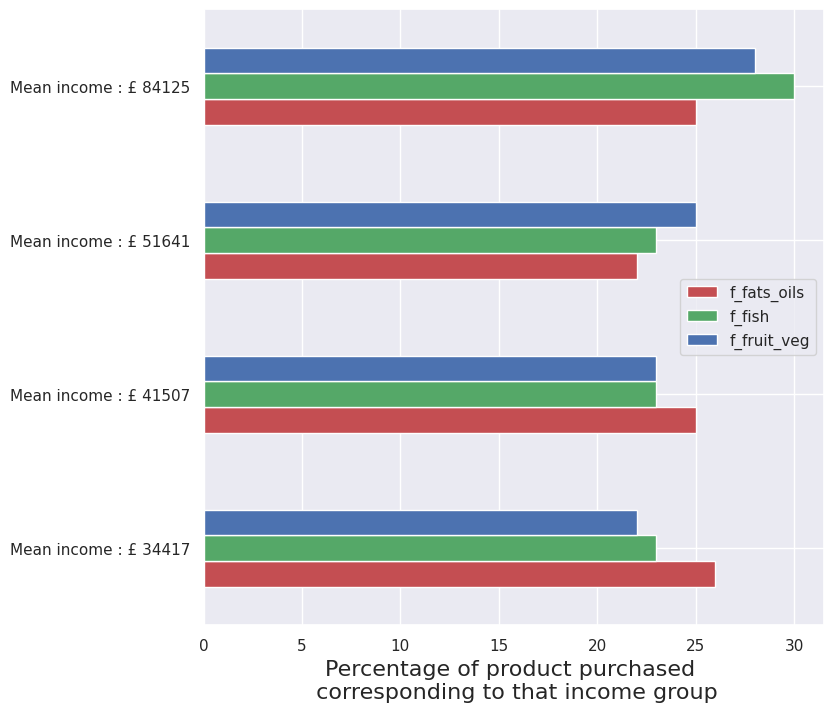

In [202]:
ax = df1.plot.barh(x='Income Groups',y=['f_fats_oils','f_fish','f_fruit_veg'],color=['r', 'g', 'b'])
plt.xlabel('Percentage of product purchased \n corresponding to that income group',fontsize=16)
plt.ylabel('',fontsize=20)
plt.xticks(rotation = 0)
# ax.set_yticks([])
# ax.set_xticks([])

In [169]:
df = df.groupby('cluster')['f_beer',
 'f_sauces',
 'f_soft_drinks',
 'f_spirits',
 'f_sweets',
 'f_tea_coffee',
 'f_water',
 'f_wine',
'Net annual income (£)'].mean().reset_index() # 
df.head()

<ipython-input-169-b58f99bc0cd9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby('cluster')['f_beer',


,cluster,f_beer,f_sauces,f_soft_drinks,f_spirits,f_sweets,f_tea_coffee,f_water,f_wine,Net annual income (£)
0,0,0.014327,0.014045,0.029203,0.003237,0.161230,0.005898,0.029407,0.016829,41507.075472
1,1,0.015486,0.013592,0.025446,0.002728,0.154992,0.005554,0.024600,0.021087,51641.538462
2,2,0.013210,0.014332,0.034320,0.003665,0.166444,0.006259,0.035831,0.013228,34417.176471
3,3,0.015773,0.014139,0.020682,0.002504,0.135669,0.005495,0.023274,0.024874,84125.000000


In [ ]:
df.to_csv('income_data_with_cat_msoa.csv')

In [173]:
soft = df['f_soft_drinks'].sum()
wine = df['f_wine'].sum()
spirits = df['f_spirits'].sum()
water = df['f_water'].sum()
df['f_soft_drinks'] = df['f_soft_drinks'].apply(lambda x : int((x/soft)*100))
df['f_wine'] = df['f_wine'].apply(lambda x : int((x/wine)*100))
df['f_spirits'] = df['f_spirits'].apply(lambda x : int((x/spirits)*100))
df['f_water'] = df['f_water'].apply(lambda x : int((x/water)*100))

df.head()

,cluster,f_beer,f_sauces,f_soft_drinks,f_spirits,f_sweets,f_tea_coffee,f_water,f_wine,Net annual income (£)
0,0,0.014327,0.014045,26,26,0.161230,0.005898,25,22,41507.075472
1,1,0.015486,0.013592,23,22,0.154992,0.005554,21,27,51641.538462
2,2,0.013210,0.014332,31,30,0.166444,0.006259,31,17,34417.176471
3,3,0.015773,0.014139,18,20,0.135669,0.005495,20,32,84125.000000


In [176]:
df['Income Groups'] = df['Net annual income (£)'].apply(lambda x:'Mean income : £ '+str(int(x)))
df.head()

,cluster,f_beer,f_sauces,f_soft_drinks,f_spirits,f_sweets,f_tea_coffee,f_water,f_wine,Net annual income (£),Mean net annual income in £ (2015),Income Groups
0,0,0.014327,0.014045,26,26,0.161230,0.005898,25,22,41507.075472,Mean income : 41507,Mean income : £ 41507
1,1,0.015486,0.013592,23,22,0.154992,0.005554,21,27,51641.538462,Mean income : 51641,Mean income : £ 51641
2,2,0.013210,0.014332,31,30,0.166444,0.006259,31,17,34417.176471,Mean income : 34417,Mean income : £ 34417
3,3,0.015773,0.014139,18,20,0.135669,0.005495,20,32,84125.000000,Mean income : 84125,Mean income : £ 84125


In [177]:
df1 = df.sort_values(by=['Net annual income (£)'])
df1.head()

,cluster,f_beer,f_sauces,f_soft_drinks,f_spirits,f_sweets,f_tea_coffee,f_water,f_wine,Net annual income (£),Mean net annual income in £ (2015),Income Groups
2,2,0.013210,0.014332,31,30,0.166444,0.006259,31,17,34417.176471,Mean income : 34417,Mean income : £ 34417
0,0,0.014327,0.014045,26,26,0.161230,0.005898,25,22,41507.075472,Mean income : 41507,Mean income : £ 41507
1,1,0.015486,0.013592,23,22,0.154992,0.005554,21,27,51641.538462,Mean income : 51641,Mean income : £ 51641
3,3,0.015773,0.014139,18,20,0.135669,0.005495,20,32,84125.000000,Mean income : 84125,Mean income : £ 84125


(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

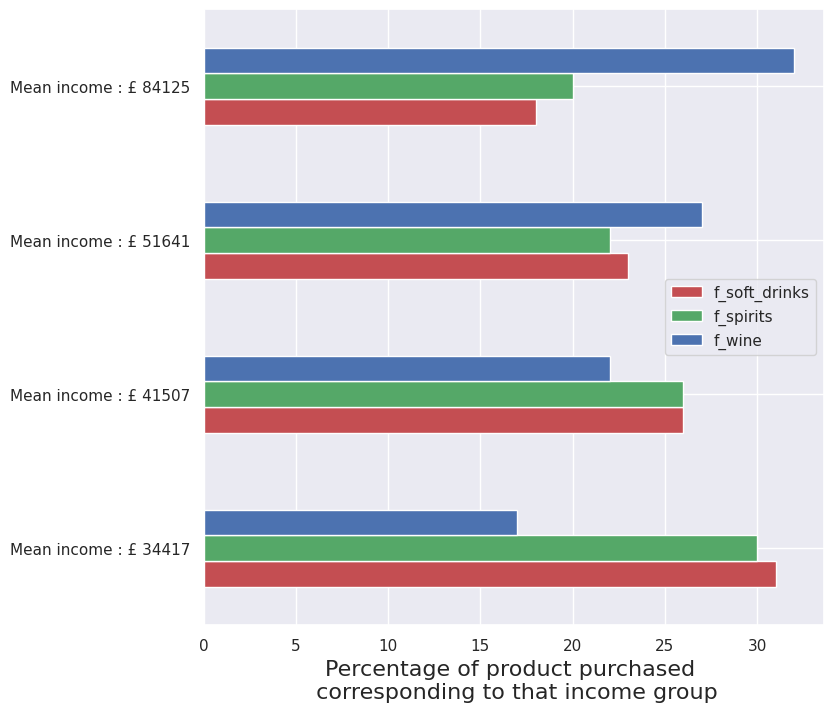

In [184]:
ax = df1.plot.barh(x='Income Groups',y=['f_soft_drinks','f_spirits','f_wine'],color=['r', 'g', 'b'])
plt.xlabel('Percentage of product purchased \n corresponding to that income group',fontsize=16)
plt.ylabel('',fontsize=20)
plt.xticks(rotation = 0)
# ax.set_yticks([])
# ax.set_xticks([])